<div id='id0' />

# Modelo predictivo

El objetivo de este notebook es hacer un análisis de diferentes modelos con el fin de estudiar si alguno de ellos podría ayudarnos a obtener algún resultado interesante sobre la posible evolución que las superficies de cultivo podrían tomar en función de las temperaturas y precipitaciones.

Nota: a la hora de recorrer el codigo, puede tardar un tiempo prolongado, especialmente en el punto 2. Optimización de los párametros.

1. [Imporatncia de las Variables](#id1)
    - [Decicion Tree](#id2)
    - [Random Forest](#id3)
2. [Optimización de los parametros en modelos Random Forest y XGBoost](#id54)
3. [Modelos](#id4)
    - [BARLEY](#id5)
        - [Regresión Lineal](#id6)
        - [K Nearest Neighbour Regressor](#id7)
        - [Random Forest](#id9)
        - [XGboost](#id10)
    - [CORN](#id11)
        - [Regresión Lineal](#id12)
        - [K Nearest Neighbour Regressor](#id13)
        - [Random Forest](#id15)
        - [XGboost](#id16)
    - [COTTON](#id17)
        - [Regresión Lineal](#id18)
        - [K Nearest Neighbour Regressor](#id19)
        - [Random Forest](#id21)
        - [XGboost](#id22)
    - [OATS](#id23)
        - [Regresión Lineal](#id24)
        - [K Nearest Neighbour Regressor](#id25)
        - [Random Forest](#id27)
        - [XGboost](#id28)
    - [SORHGHUM](#id29)
        - [Regresión Lineal](#id30)
        - [K Nearest Neighbour Regressor](#id31)
        - [Random Forest](#id33)
        - [XGboost](#id34)
    - [SOYBEANS](#id35)
        - [Regresión Lineal](#id36)
        - [K Nearest Neighbour Regressor](#id37)
        - [Random Forest](#id39)
        - [XGboost](#id40)
    - [WEATH](#id41)
        - [Regresión Lineal](#id42)
        - [K Nearest Neighbour Regressor](#id43)
        - [Random Forest](#id45)
        - [XGboost](#id46)
    - [GLOBAL](#id47)
        - [Regresión Lineal](#id48)
        - [K Nearest Neighbour Regressor](#id49)
        - [Random Forest](#id51)
        - [XGboost](#id52)
    - [Resumen y comparativa de los Modelos](#id54)
3. [Conclusiones](#id53)

In [2]:
#--BASE--#
%matplotlib inline
import pandas as pd
import warnings
import numpy as np
import datetime
import os
from datetime import timedelta
import functions # hoja de funciones creadas para este trabajo

#--VISUALIZACIÓN--#
import matplotlib as mpl
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from statsmodels.graphics.factorplots import interaction_plot
import graphviz 
import shap
import pydot

#--CONFIGURACIÓN--#
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.options.display.float_format = '{:.2f}'.format
warnings.filterwarnings('ignore')

plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
#style.use('ggplot') or plt.style.use('ggplot')

#--MODELOS--#
from sklearn.model_selection import train_test_split

[up](#id0)

<div id='id1' />

## Importancia de las variables

In [3]:
#Variables diferenciadas por cultivos y año
df_crops = pd.read_csv('../DATOS/archivos creados analisis/variables_por_cultivos.csv')
df_crops.set_index('date', inplace=True)

#Agrupación del las variables por año
df_agrupation = pd.read_csv('../DATOS/archivos creados analisis/variables_agrupadas.csv')
df_agrupation.set_index('date', inplace=True)

In [4]:
df_crops.head()

BARLEY_Prec  CORN_Prec  COTTON_Prec  OATS_Prec  SORGHUM_Prec  \
date                                                                 
1950        73.98      78.74        86.30      78.74         75.46   
1951        75.42      80.57        83.04      80.57         75.67   
1952        65.15      70.29        75.06      70.29         63.43   
1953        66.40      74.99        79.14      74.99         68.09   
1954        64.11      70.48        66.31      70.48         60.45   

      SOYBEANS_Prec  WHEAT_Prec  BARLEY_Temp  CORN_Temp  COTTON_Temp  \
date                                                                   
1950          88.53       75.43         9.92      10.51        15.08   
1951          88.68       75.97         9.94      10.59        15.06   
1952          77.93       65.44        10.68      11.21        15.30   
1953          80.63       67.08        11.58      11.81        15.72   
1954          72.83       62.88        11.40      11.53        15.89   

      OATS_Temp  SORGHUM_Temp  SOYBEANS_Temp  WHEAT_Temp  BARLEY_Ha  \
date                                                                  
1950      10.51         11.68          11.45       10.54 5264964.86   
1951      10.59         11.61          11.65       10.56 4366561.94   
1952      11.21         12.43          12.45       11.28 3719064.34   
1953      11.81         13.24          12.98       11.87 3891055.89   
1954      11.53         13.73          12.78       11.72 5965071.64   

         CORN_Ha   COTTON_Ha     OATS_Ha  SORGHUM_Ha  SOYBEANS_Ha    WHEAT_Ha  
date                                                                           
1950 33531877.27  7647594.15 18228676.18  6497233.73   6089714.93 28848850.88  
1951 33700226.65 11878100.66 16598196.29  6081621.21   6141514.74 31777563.46  
1952 33277329.78 11362085.54 17134809.93  4973186.25   6457979.19 31826530.47  
1953 33011855.76 10874560.32 17490528.92  5904368.74   6634422.28 31942270.67  
1954 33259118.91  8114682.73 18978964.03  8153613.53   7503283.13 25308657.75

In [5]:
df_agrupation.head()

Precipitation  Temperature      hectare
date                                         
1950          77.17        10.84 113168699.75
1951          77.93        10.88 117282009.19
1952          67.37        11.61 114640623.67
1953          71.33        12.20 116486396.52
1954          65.87        12.07 115083431.09

[up](#id0)


El objetivo de la creación de estas imágenes a partir de los modelos de "Decision Tree" y "Random Forest" es ver y estudiar que variable independiente tiene mayor peso sobre la variable dependiente a la hora de hacer una predicción y por lo tanto también ver que variable independiente tiene mayor influencia sobre la variable dependiente.

<div id='id2' />

### Decicion Tree
- Imagenes representada en el archivo: "../NOTEBOOKS/images/Decision_Tree/"

In [6]:
functions.Decision_Tree(df_crops[['BARLEY_Prec', 'BARLEY_Temp']], df_crops['BARLEY_Ha'], image_name = 'BARLEY')
functions.Decision_Tree(df_crops[['CORN_Prec', 'CORN_Temp']], df_crops['CORN_Ha'], image_name = 'CORN')
functions.Decision_Tree(df_crops[['COTTON_Prec', 'COTTON_Temp']], df_crops['COTTON_Ha'], image_name = 'COTTON')
functions.Decision_Tree(df_crops[['OATS_Prec', 'OATS_Temp']], df_crops['OATS_Ha'], image_name = 'OATS')
functions.Decision_Tree(df_crops[['SORGHUM_Prec', 'SORGHUM_Temp']], df_crops['SORGHUM_Ha'], image_name = 'SOURGHUM')
functions.Decision_Tree(df_crops[['SOYBEANS_Prec', 'SOYBEANS_Temp']], df_crops['SOYBEANS_Ha'], image_name = 'SOYBEANS')
functions.Decision_Tree(df_crops[['WHEAT_Prec', 'WHEAT_Temp']], df_crops['WHEAT_Ha'], image_name = 'WHEAT')

functions.Decision_Tree(df_agrupation[['Precipitation', 'Temperature']], df_agrupation['hectare'], image_name = 'Agrupation dataset')

[up](#id0)

<div id='id3' />

### Random Forest
- Imagenes representada en el archivo: ../NOTEBOOKS/images/Random_Forest/

In [7]:
functions.Random_Forest(df_crops[['BARLEY_Prec', 'BARLEY_Temp']], df_crops['BARLEY_Ha'], 'BARLEY', image_name = 'BARLEY')
functions.Random_Forest(df_crops[['CORN_Prec', 'CORN_Temp']], df_crops['CORN_Ha'], 'CORN', image_name = 'CORN')
functions.Random_Forest(df_crops[['COTTON_Prec', 'COTTON_Temp']], df_crops['COTTON_Ha'], 'COTTON', image_name = 'COTTON')
functions.Random_Forest(df_crops[['OATS_Prec', 'OATS_Temp']], df_crops['OATS_Ha'], 'OATS', image_name = 'OATS')
functions.Random_Forest(df_crops[['SORGHUM_Prec', 'SORGHUM_Temp']], df_crops['SORGHUM_Ha'], 'SOURGHUM', image_name = 'SOURGHUM')
functions.Random_Forest(df_crops[['SOYBEANS_Prec', 'SOYBEANS_Temp']], df_crops['SOYBEANS_Ha'], 'SOYBEANS', image_name = 'SOYBEANS')
functions.Random_Forest(df_crops[['WHEAT_Prec', 'WHEAT_Temp']], df_crops['WHEAT_Ha'], 'WHEAT', image_name = 'WHEAT')

functions.Random_Forest(df_agrupation[['Precipitation', 'Temperature']], df_agrupation['hectare'], 'Agrupation dataset', image_name = 'Agrupation dataset')

[up](#id0)

<div id='id54' />

## Optimización de los parámetros en modelos Random Forest y XGBoost

Con esta optimización lo que se busca es identificar la mejor configuración de los parámetros de estos modelos.

Para este caso se buscan las mejores opciones de los modelos de Random forest y XGBoost para cada uno de los cultivos.

In [8]:
#BARLEY
#Selección de variables
X = df_crops[['BARLEY_Prec', 'BARLEY_Temp']] 
y = df_crops['BARLEY_Ha']

#Creación de train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)
X_train.shape, X_test.shape

((54, 2), (18, 2))

In [9]:
functions.Random_Forest_Tuning(X_train, y_train)

Random Forest Parameters: {'criterion': 'friedman_mse', 'max_depth': 2, 'max_features': 'sqrt', 'n_estimators': 1}


In [10]:
functions.XGBoost_Tuning(X_train, y_train)

XGBoost parameters: {'gamma': 1e-05, 'max_depth': 1, 'min_child_weight': 1, 'n_estimators': 5}


In [11]:
#CORN
#Selección de variables
X = df_crops[['CORN_Prec', 'CORN_Temp']] 
y = df_crops['CORN_Ha']

#Creación de train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)
X_train.shape, X_test.shape

((54, 2), (18, 2))

In [12]:
functions.Random_Forest_Tuning(X_train, y_train)

Random Forest Parameters: {'criterion': 'friedman_mse', 'max_depth': 3, 'max_features': 'log2', 'n_estimators': 5}


In [13]:
functions.XGBoost_Tuning(X_train, y_train)

XGBoost parameters: {'gamma': 1e-05, 'max_depth': 2, 'min_child_weight': 3, 'n_estimators': 10}


In [14]:
#COTTON
#Selección de variables
X = df_crops[['COTTON_Prec', 'COTTON_Temp']] 
y = df_crops['COTTON_Ha']

#Creación de train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)
X_train.shape, X_test.shape

((54, 2), (18, 2))

In [15]:
functions.Random_Forest_Tuning(X_train, y_train)

Random Forest Parameters: {'criterion': 'absolute_error', 'max_depth': 1, 'max_features': 'log2', 'n_estimators': 3}


In [16]:
functions.XGBoost_Tuning(X_train, y_train)

XGBoost parameters: {'gamma': 1e-05, 'max_depth': 1, 'min_child_weight': 4, 'n_estimators': 10}


In [17]:
#OATS
#Selección de variables
X = df_crops[['OATS_Prec', 'OATS_Temp']] 
y = df_crops['OATS_Ha']

#Creación de train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)
X_train.shape, X_test.shape

((54, 2), (18, 2))

In [18]:
functions.Random_Forest_Tuning(X_train, y_train)

Random Forest Parameters: {'criterion': 'absolute_error', 'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 1}


In [19]:
functions.XGBoost_Tuning(X_train, y_train)

XGBoost parameters: {'gamma': 1e-05, 'max_depth': 2, 'min_child_weight': 5, 'n_estimators': 1}


In [20]:
#SORGHUM
#Selección de variables
X = df_crops[['SORGHUM_Prec', 'SORGHUM_Temp']] 
y = df_crops['SORGHUM_Ha']

#Creación de train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)
X_train.shape, X_test.shape

((54, 2), (18, 2))

In [21]:
functions.Random_Forest_Tuning(X_train, y_train)

Random Forest Parameters: {'criterion': 'squared_error', 'max_depth': 1, 'max_features': 'auto', 'n_estimators': 5}


In [22]:
functions.XGBoost_Tuning(X_train, y_train)

XGBoost parameters: {'gamma': 1e-05, 'max_depth': 1, 'min_child_weight': 5, 'n_estimators': 10}


In [23]:
#SOYBEANS
#Selección de variables
X = df_crops[['SOYBEANS_Prec', 'SOYBEANS_Temp']] 
y = df_crops['SOYBEANS_Ha']

#Creación de train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)
X_train.shape, X_test.shape

((54, 2), (18, 2))

In [24]:
functions.XGBoost_Tuning(X_train, y_train)

XGBoost parameters: {'gamma': 1e-05, 'max_depth': 1, 'min_child_weight': 5, 'n_estimators': 10}


In [25]:
functions.Random_Forest_Tuning(X_train, y_train)

Random Forest Parameters: {'criterion': 'absolute_error', 'max_depth': 1, 'max_features': 'auto', 'n_estimators': 5}


In [26]:
#WHEAT
#Selección de variables
X = df_crops[['WHEAT_Prec', 'WHEAT_Temp']] 
y = df_crops['WHEAT_Ha']

#Creación de train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)
X_train.shape, X_test.shape

((54, 2), (18, 2))

In [27]:
functions.Random_Forest_Tuning(X_train, y_train)

Random Forest Parameters: {'criterion': 'absolute_error', 'max_depth': 1, 'max_features': 'auto', 'n_estimators': 5}


In [28]:
functions.XGBoost_Tuning(X_train, y_train)

XGBoost parameters: {'gamma': 1e-05, 'max_depth': 1, 'min_child_weight': 2, 'n_estimators': 10}


In [29]:
#AGRUPATION
#Selección de variables
X = df_agrupation[['Precipitation', 'Temperature']]
y = df_agrupation['hectare']

#Creación de train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)
X_train.shape, X_test.shape

((54, 2), (18, 2))

In [30]:
functions.Random_Forest_Tuning(X_train, y_train)

Random Forest Parameters: {'criterion': 'friedman_mse', 'max_depth': 1, 'max_features': 'log2', 'n_estimators': 3}


In [31]:
functions.XGBoost_Tuning(X_train, y_train)

XGBoost parameters: {'gamma': 1e-05, 'max_depth': 1, 'min_child_weight': 6, 'n_estimators': 10}


[up](#id0)

<div id='id4' />

## Modelos

Para la creación de las variables de train y test no se indica una selección de datos aleatorios que estan ordenador por fecha

[up](#id0)

<div id='id4' />

### BARLEY

<div id='id5' />

#### Linear Regresion

(MAE) Test Mean absolute error: 2027386.17
(MSE) Test mean squared error: 1423.86
Test R2 score: -71.08


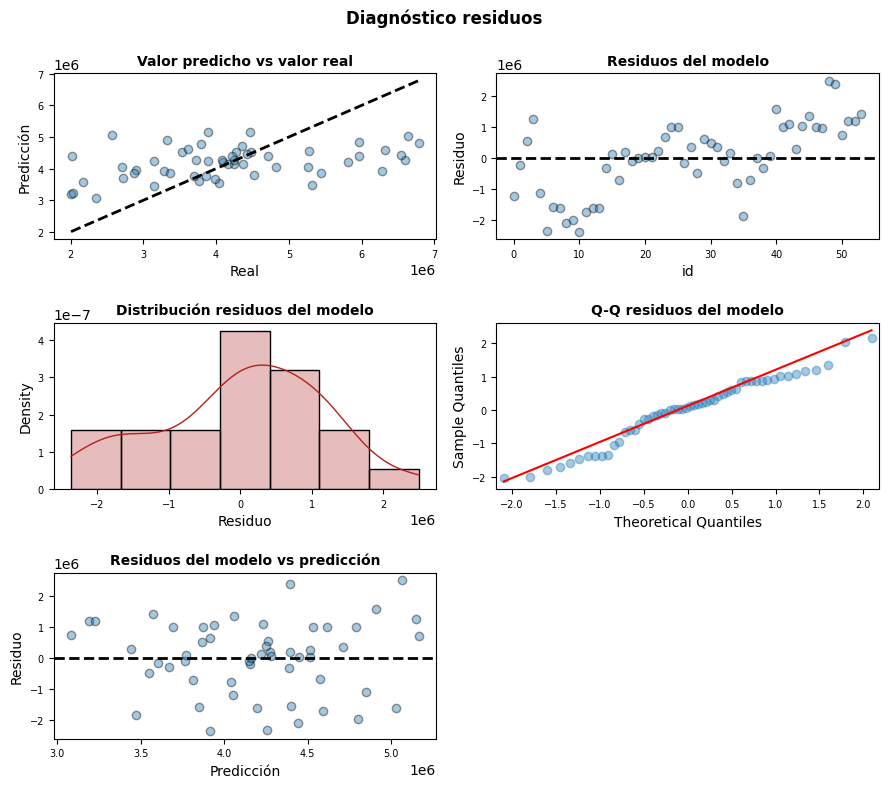

In [69]:
#Selección de variables
X = df_crops[['BARLEY_Prec', 'BARLEY_Temp']] 
y = df_crops['BARLEY_Ha']

#Creación de train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)
X_train.shape, X_test.shape

#Aplicación del modelo
functions.Linear_Regression(X_train, X_test, y_train, y_test)

[up](#id0)

<div id='id6' />

#### K Nearest Neighbour Regressor

(MAE) Test Mean absolute error: 2500925.76
(MSE) Test mean squared error: 1581.43
Test R2 score: -106.91


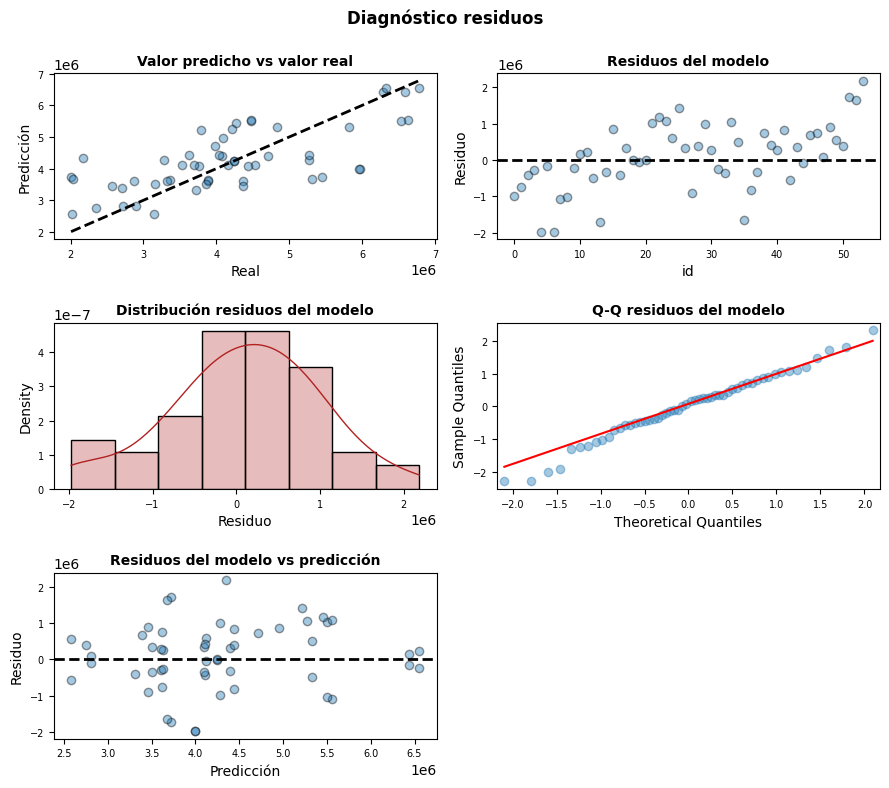

In [70]:
#Selección de variables
X = df_crops[['BARLEY_Prec', 'BARLEY_Temp']] 
y = df_crops['BARLEY_Ha']

#Creación de train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)
X_train.shape, X_test.shape

#Aplicación del modelo
functions.K_Nearest_Neighbour_Regressor(X_train, X_test, y_train, y_test)

[up](#id0)

<div id='id8' />

#### Random Forest

(MAE) Test Mean absolute error: 1933781.821
(MSE) Test mean squared error: 1390.605
Test R2 score: -68.428


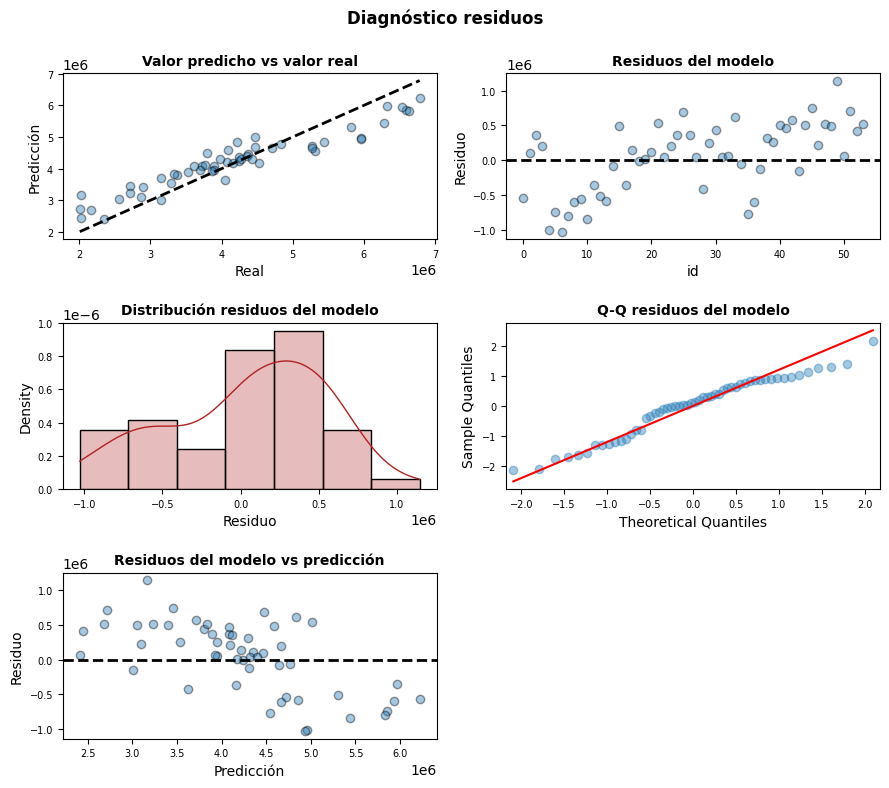

In [71]:
#Selección de variables
X = df_crops[['BARLEY_Prec', 'BARLEY_Temp']] 
y = df_crops['BARLEY_Ha']

#Creación de train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)
X_train.shape, X_test.shape

#Aplicación del modelo
functions.Random_Forest_regressor(X_train, X_test, y_train, y_test, criterion='friedman_mse', max_depth= 2, max_features='sqrt', n_estimators= 1)

[up](#id0)

<div id='id9' />

#### XGboost

(MAE) Test Mean absolute error: 1736751.388
(MSE) Test mean squared error: 1317.859
Test R2 score: -60.611


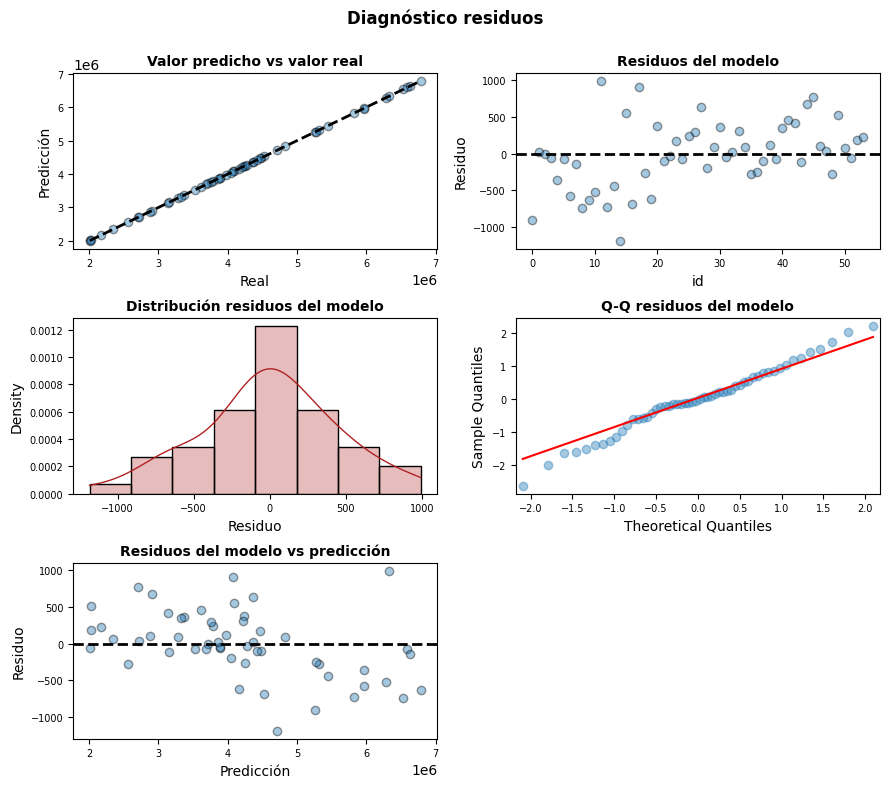

In [36]:
#Selección de variables
X = df_crops[['BARLEY_Prec', 'BARLEY_Temp']] 
y = df_crops['BARLEY_Ha']

#Creación de train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)
X_train.shape, X_test.shape

#Aplicación del modelo
functions.XGB_Regressor(X_train, X_test, y_train, y_test, gamma=  0.00001, max_depth = 1, min_child_weight = 1, n_estimators = 5)

[up](#id0)

<div id='id11' />

### CORN

<div id='id12' />

#### Linear Regresion

(MAE) Test Mean absolute error: 4403033.84
(MSE) Test mean squared error: 2098.34
Test R2 score: -4.31


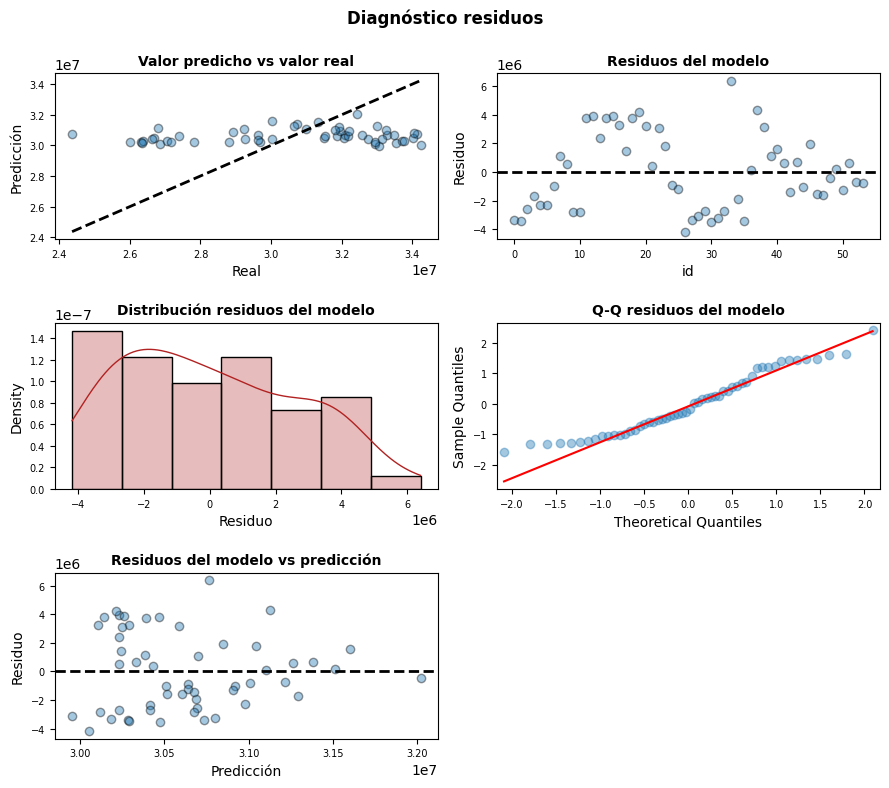

In [37]:
#Selección de variables
X = df_crops[['CORN_Prec', 'CORN_Temp']] 
y = df_crops['CORN_Ha']

#Creación de train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)
X_train.shape, X_test.shape

#Aplicación del modelo
functions.Linear_Regression(X_train, X_test, y_train, y_test)

[up](#id0)

<div id='id13' />

#### K Nearest Neighbour Regressor

(MAE) Test Mean absolute error: 4457144.16
(MSE) Test mean squared error: 2111.19
Test R2 score: -4.76


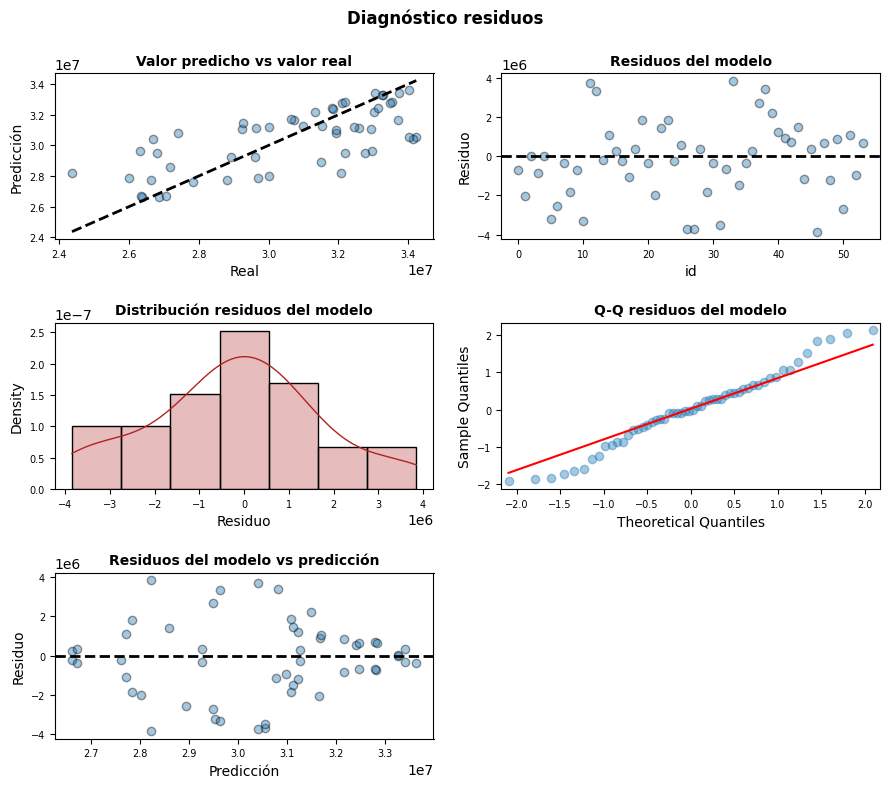

In [38]:
#Selección de variables
X = df_crops[['CORN_Prec', 'CORN_Temp']] 
y = df_crops['CORN_Ha']

#Creación de train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)
X_train.shape, X_test.shape

#Aplicación del modelo
functions.K_Nearest_Neighbour_Regressor(X_train, X_test, y_train, y_test)

[up](#id0)

<div id='id15' />

#### Random Forest

(MAE) Test Mean absolute error: 4705269.059
(MSE) Test mean squared error: 2169.163
Test R2 score: -5.272


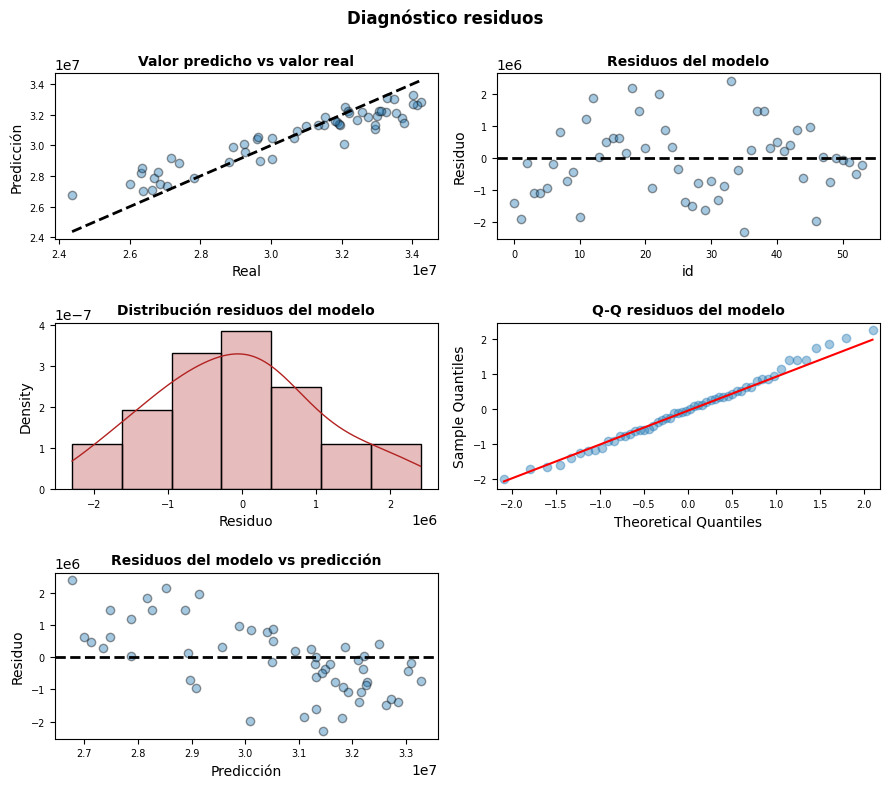

In [39]:
#Selección de variables
X = df_crops[['CORN_Prec', 'CORN_Temp']] 
y = df_crops['CORN_Ha']

#Creación de train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)
X_train.shape, X_test.shape

#Aplicación del modelo
functions.Random_Forest_regressor(X_train, X_test, y_train, y_test, criterion='friedman_mse', max_depth= 3, max_features='log2', n_estimators= 5)

[up](#id0)

<div id='id16' />

#### XGboost

(MAE) Test Mean absolute error: 4642398.545
(MSE) Test mean squared error: 2154.623
Test R2 score: -5.38


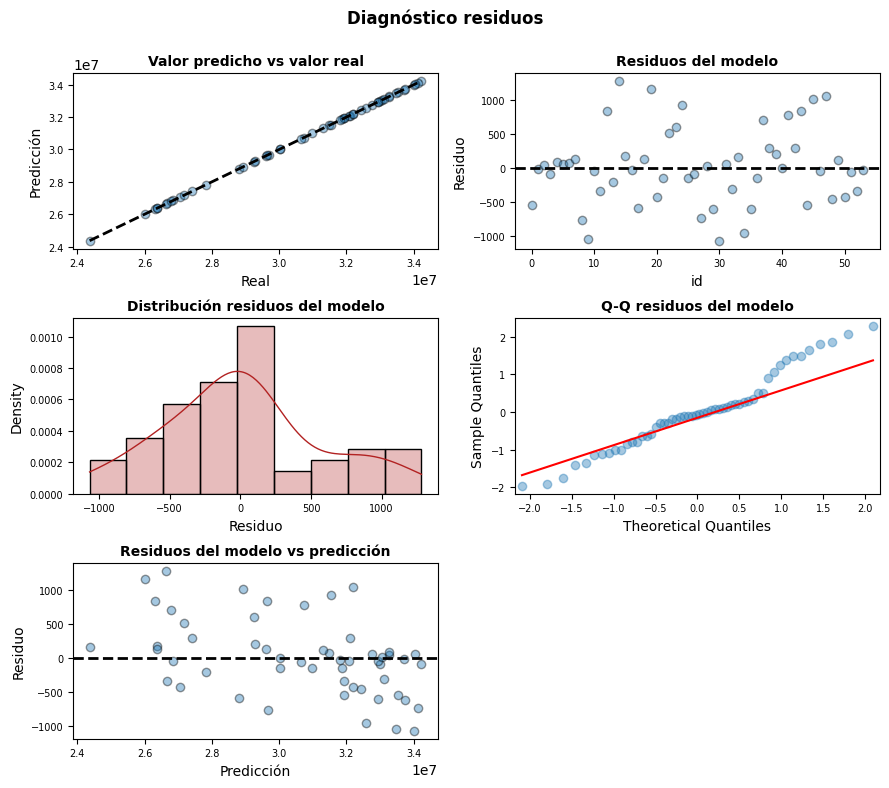

In [40]:
#Selección de variables
X = df_crops[['CORN_Prec', 'CORN_Temp']] 
y = df_crops['CORN_Ha']

#Creación de train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)
X_train.shape, X_test.shape

#Aplicación del modelo
functions.XGB_Regressor(X_train, X_test, y_train, y_test, gamma=  0.00001, max_depth = 2, min_child_weight = 3, n_estimators = 10)

[up](#id0)

<div id='id17' />

### COTTON

<div id='id18' />

#### Linear Regresion

(MAE) Test Mean absolute error: 1364205.27
(MSE) Test mean squared error: 1167.99
Test R2 score: -3.11


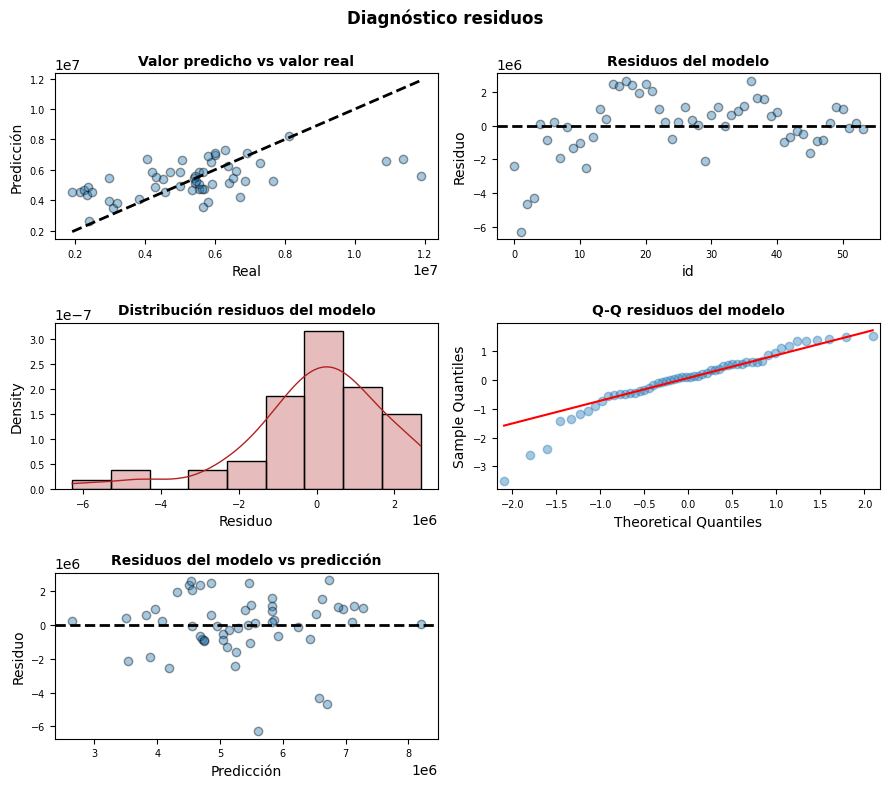

In [41]:
#Selección de variables
X = df_crops[['COTTON_Prec', 'COTTON_Temp']] 
y = df_crops['COTTON_Ha']

#Creación de train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)
X_train.shape, X_test.shape

#Aplicación del modelo
functions.Linear_Regression(X_train, X_test, y_train, y_test)

[up](#id0)

<div id='id19' />

#### K Nearest Neighbour Regressor

(MAE) Test Mean absolute error: 1585540.64
(MSE) Test mean squared error: 1259.18
Test R2 score: -4.35


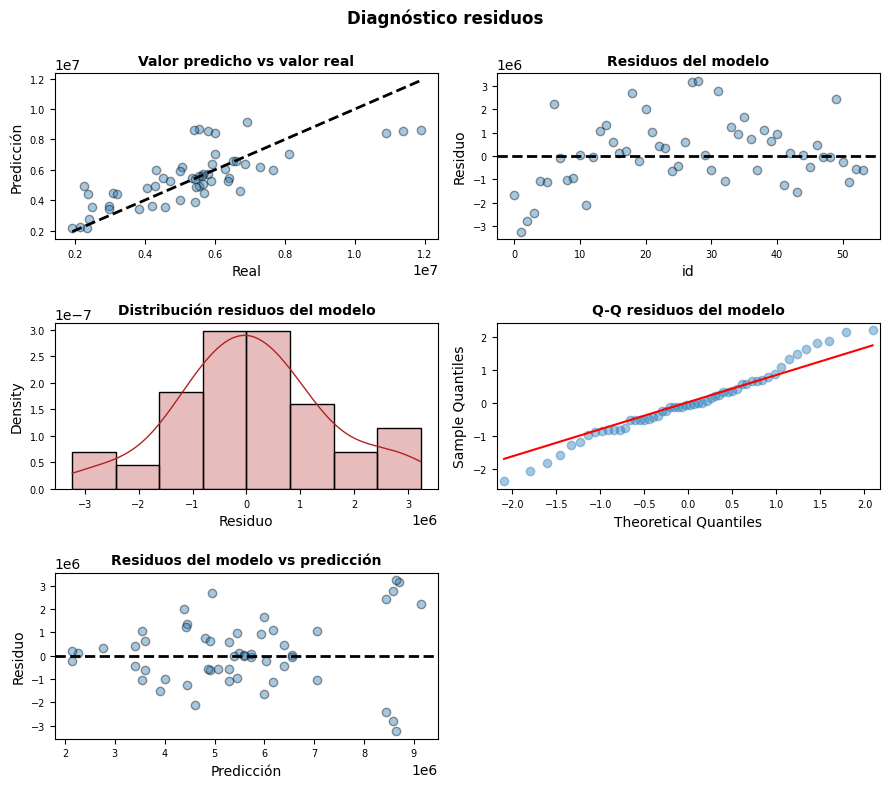

In [42]:
#Selección de variables
X = df_crops[['COTTON_Prec', 'COTTON_Temp']] 
y = df_crops['COTTON_Ha']

#Creación de train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)
X_train.shape, X_test.shape

#Aplicación del modelo
functions.K_Nearest_Neighbour_Regressor(X_train, X_test, y_train, y_test)

[up](#id0)

<div id='id21' />

#### Random Forest

(MAE) Test Mean absolute error: 1111615.067
(MSE) Test mean squared error: 1054.332
Test R2 score: -2.257


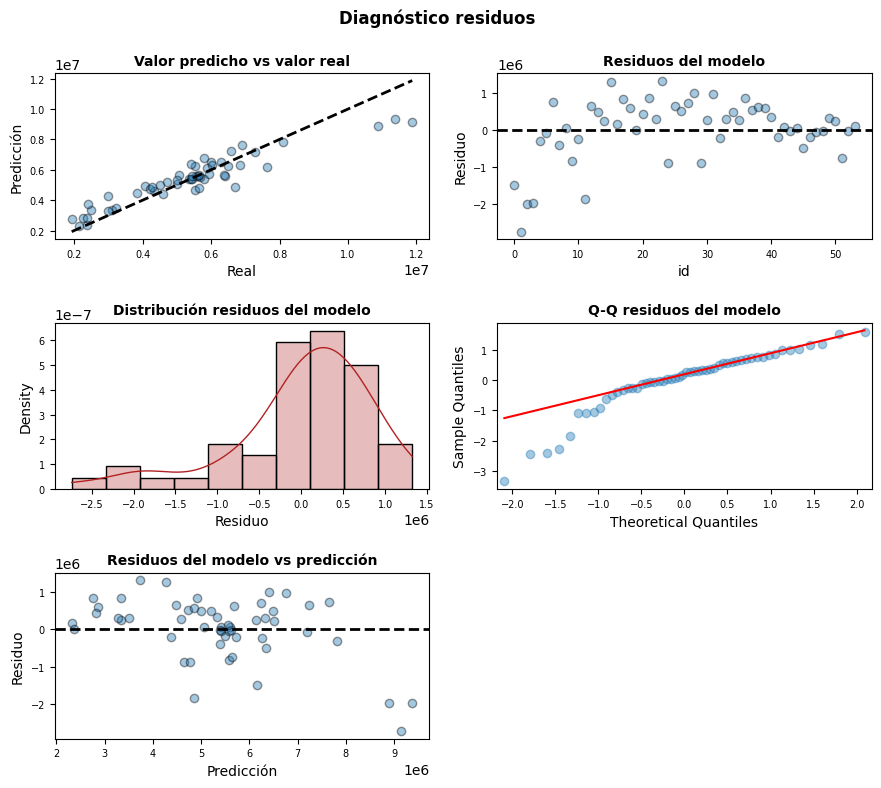

In [43]:
#Selección de variables
X = df_crops[['COTTON_Prec', 'COTTON_Temp']] 
y = df_crops['COTTON_Ha']

#Creación de train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)
X_train.shape, X_test.shape

#Aplicación del modelo
functions.Random_Forest_regressor(X_train, X_test, y_train, y_test, criterion='absolute_error', max_depth= 1, max_features='log2', n_estimators= 3)

[up](#id0)

<div id='id22' />

#### XGboost

(MAE) Test Mean absolute error: 1341184.633
(MSE) Test mean squared error: 1158.095
Test R2 score: -4.607


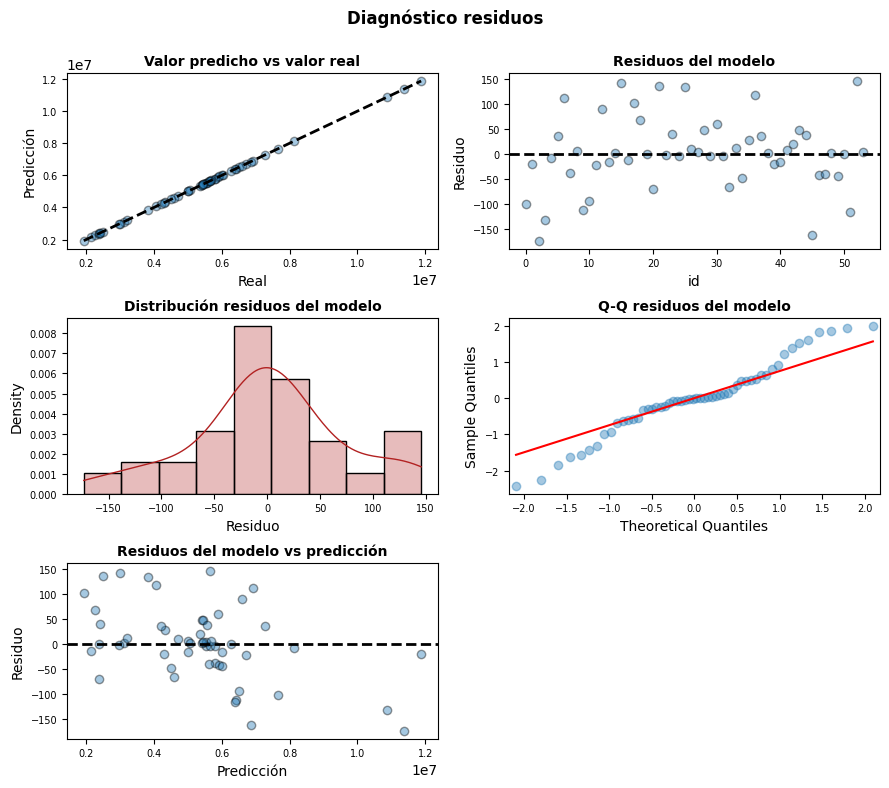

In [44]:
#Selección de variables
X = df_crops[['COTTON_Prec', 'COTTON_Temp']] 
y = df_crops['COTTON_Ha']

#Creación de train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)
X_train.shape, X_test.shape

#Aplicación del modelo
functions.XGB_Regressor(X_train, X_test, y_train, y_test, gamma=  0.00001, max_depth = 1, min_child_weight = 4, n_estimators = 10)

[up](#id0)

<div id='id23' />

### OATS

<div id='id24' />

#### Linear Regresion

(MAE) Test Mean absolute error: 6667478.72
(MSE) Test mean squared error: 2582.15
Test R2 score: -1004.4


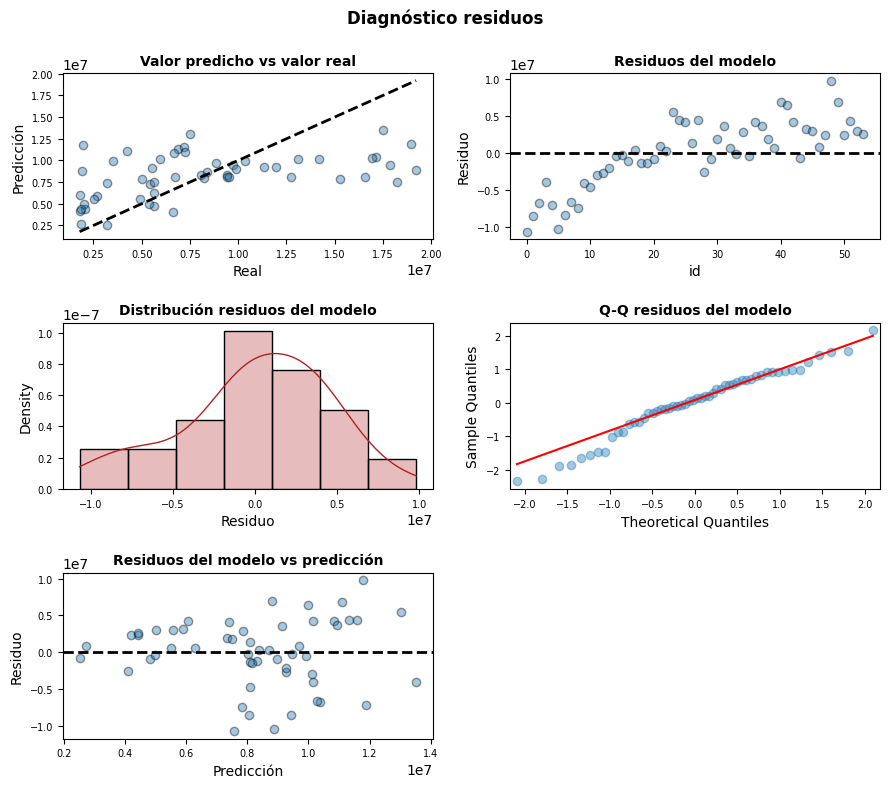

In [46]:
#Selección de variables
X = df_crops[['OATS_Prec', 'OATS_Temp']] 
y = df_crops['OATS_Ha']

#Creación de train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)
X_train.shape, X_test.shape

#Aplicación del modelo
functions.Linear_Regression(X_train, X_test, y_train, y_test)

[up](#id0)

<div id='id25' />

#### K Nearest Neighbour Regressor

(MAE) Test Mean absolute error: 7427319.07
(MSE) Test mean squared error: 2725.31
Test R2 score: -1468.72


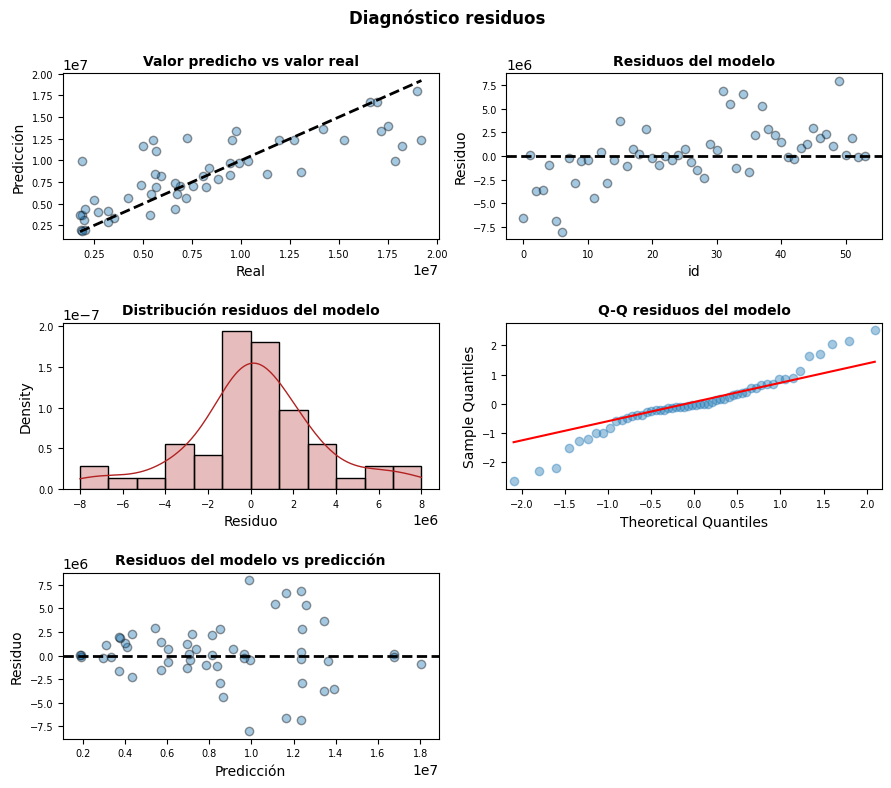

In [47]:
#Selección de variables
X = df_crops[['OATS_Prec', 'OATS_Temp']] 
y = df_crops['OATS_Ha']

#Creación de train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)
X_train.shape, X_test.shape

#Aplicación del modelo
functions.K_Nearest_Neighbour_Regressor(X_train, X_test, y_train, y_test)

[up](#id0)

<div id='id27' />

#### Random Forest

(MAE) Test Mean absolute error: 6719965.575
(MSE) Test mean squared error: 2592.29
Test R2 score: -1100.031


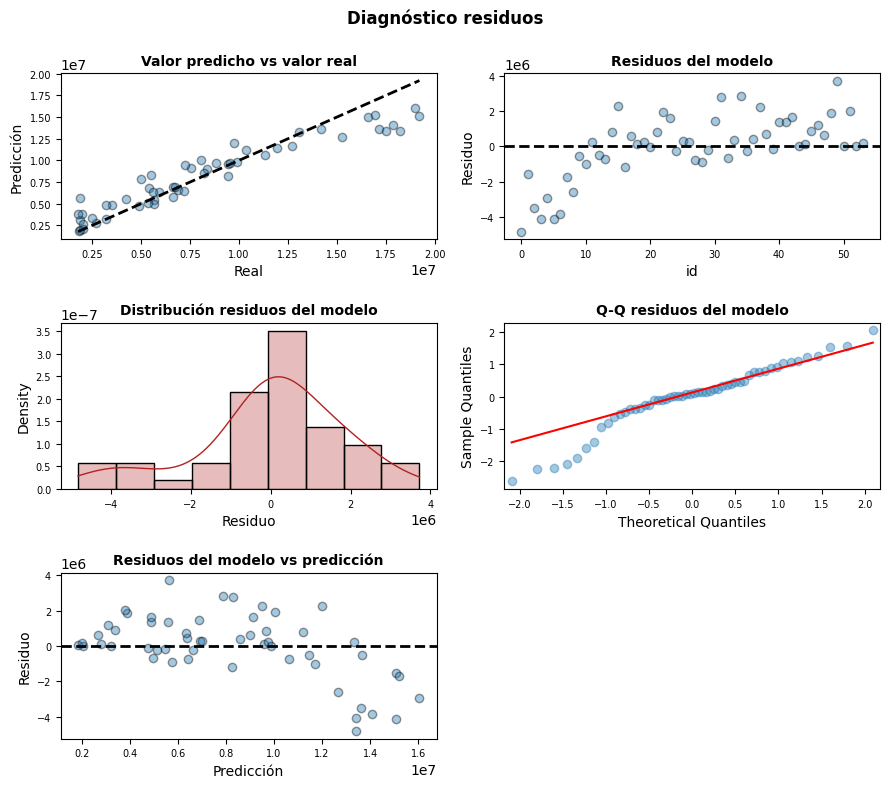

In [50]:
#Selección de variables
X = df_crops[['OATS_Prec', 'OATS_Temp']] 
y = df_crops['OATS_Ha']

#Creación de train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)
X_train.shape, X_test.shape

#Aplicación del modelo
functions.Random_Forest_regressor(X_train, X_test, y_train, y_test, criterion='absolute_error', max_depth= 7, max_features='sqrt', n_estimators= 1)

[up](#id0)

<div id='id28' />

#### XGboost

(MAE) Test Mean absolute error: 6657613.148
(MSE) Test mean squared error: 2580.235
Test R2 score: -1182.686


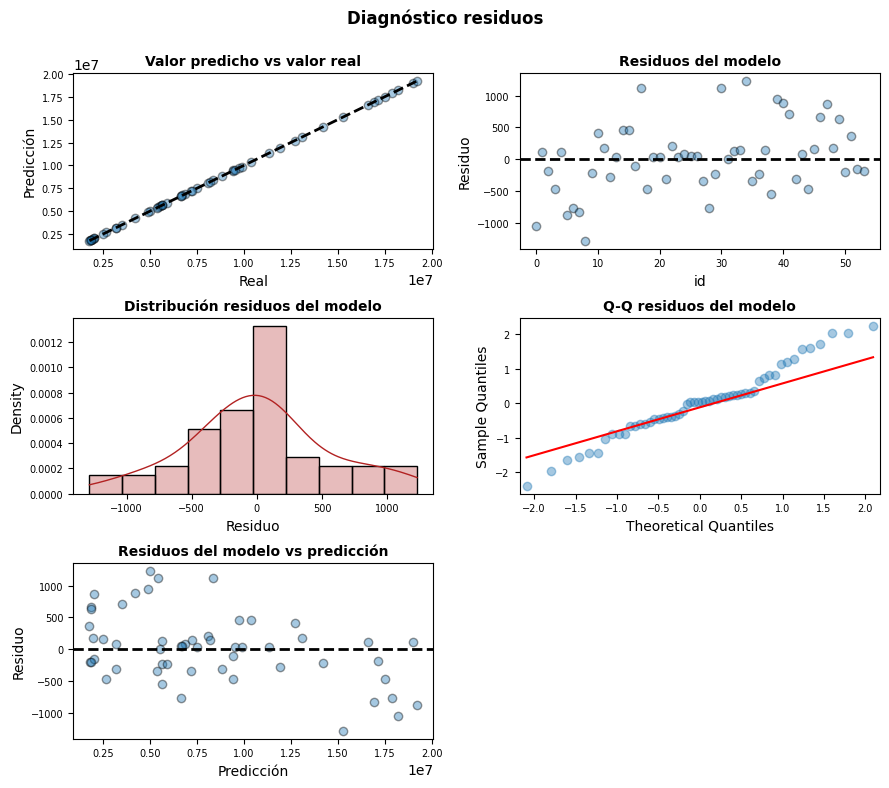

In [51]:
#Selección de variables
X = df_crops[['OATS_Prec', 'OATS_Temp']] 
y = df_crops['OATS_Ha']

#Creación de train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)
X_train.shape, X_test.shape

#Aplicación del modelo
functions.XGB_Regressor(X_train, X_test, y_train, y_test, gamma=  0.00001, max_depth = 2, min_child_weight = 5, n_estimators = 1)

[up](#id0)

<div id='id29' />

### SOURGHUM

<div id='id30' />

#### Linear Regresion

(MAE) Test Mean absolute error: 3034744.53
(MSE) Test mean squared error: 1742.05
Test R2 score: -64.53


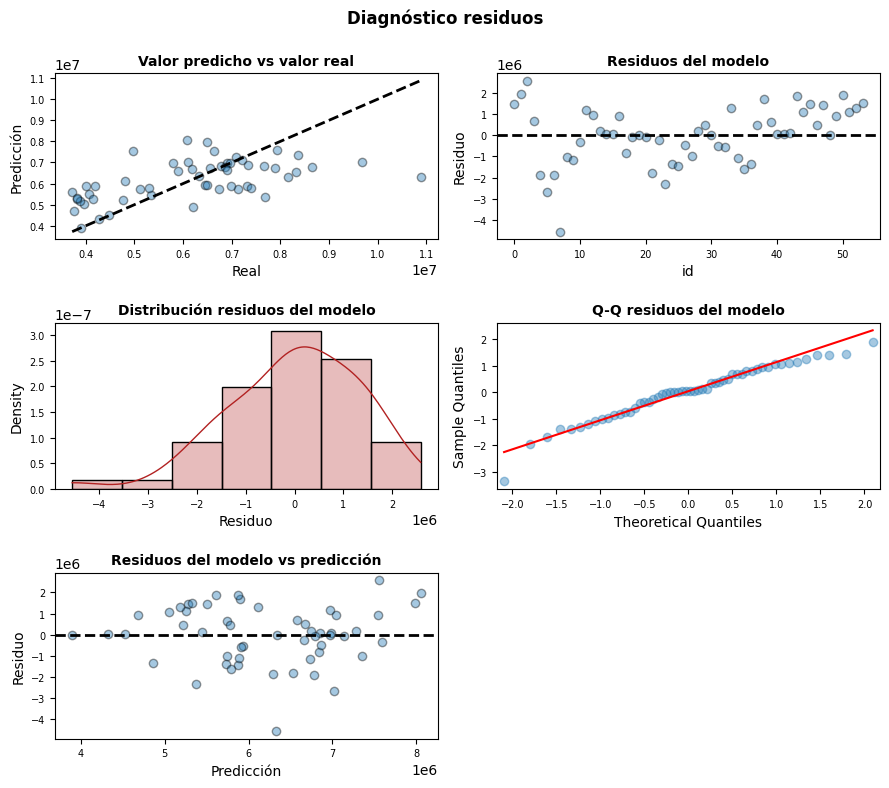

In [52]:
X = df_crops[['SORGHUM_Prec', 'SORGHUM_Temp']] 
y = df_crops['SORGHUM_Ha']

#Creación de train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)
X_train.shape, X_test.shape

#Aplicación del modelo
functions.Linear_Regression(X_train, X_test, y_train, y_test)

[up](#id0)

<div id='id31' />

#### K Nearest Neighbour Regressor

(MAE) Test Mean absolute error: 3613711.08
(MSE) Test mean squared error: 1900.98
Test R2 score: -94.33


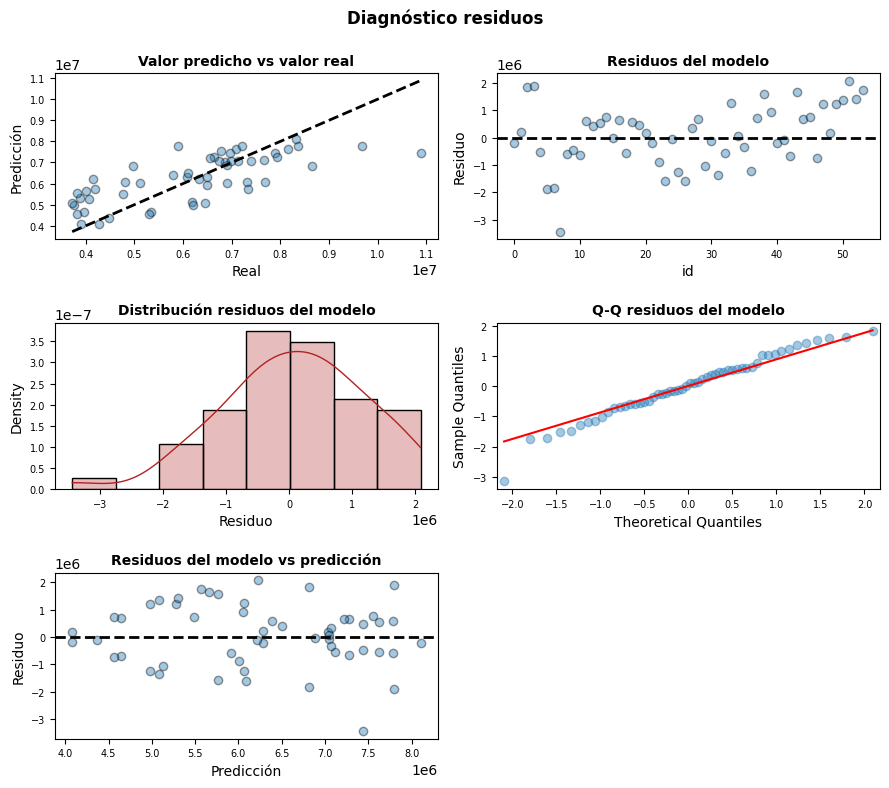

In [53]:
#Selección de variables
X = df_crops[['SORGHUM_Prec', 'SORGHUM_Temp']] 
y = df_crops['SORGHUM_Ha']

#Creación de train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)
X_train.shape, X_test.shape

#Aplicación del modelo
functions.K_Nearest_Neighbour_Regressor(X_train, X_test, y_train, y_test)

[up](#id0)

<div id='id33' />

#### Random Forest

(MAE) Test Mean absolute error: 2720384.501
(MSE) Test mean squared error: 1649.359
Test R2 score: -51.251


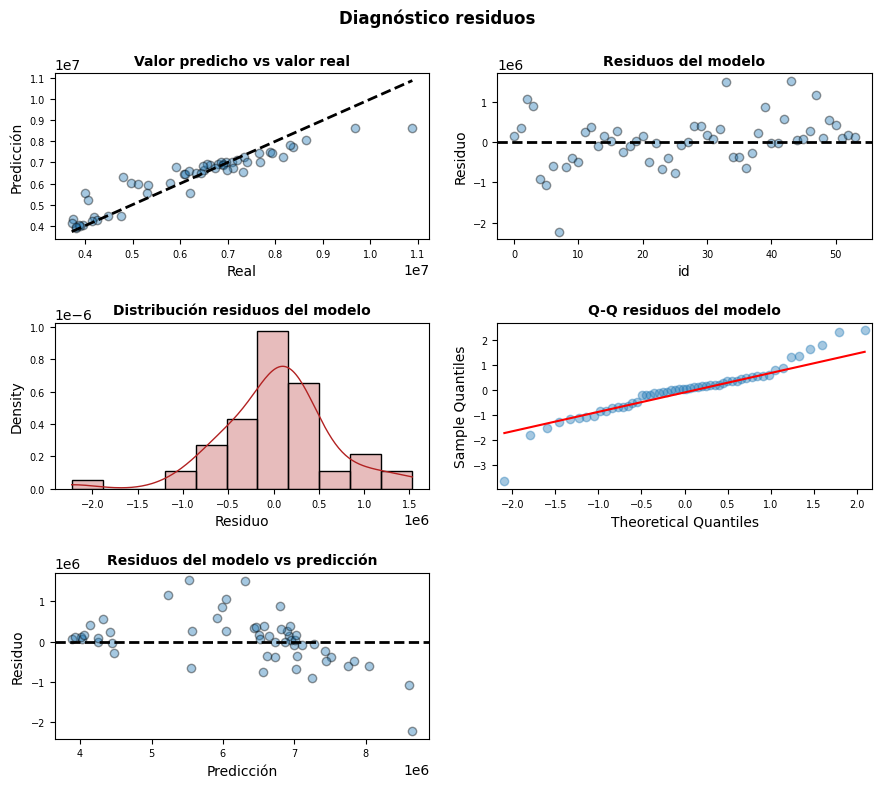

In [54]:
#Selección de variables
X = df_crops[['SORGHUM_Prec', 'SORGHUM_Temp']] 
y = df_crops['SORGHUM_Ha']

#Creación de train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)
X_train.shape, X_test.shape

#Aplicación del modelo
functions.Random_Forest_regressor(X_train, X_test, y_train, y_test, criterion='squared_error', max_depth= 1, max_features='auto', n_estimators= 5)

[up](#id0)

<div id='id34' />

#### XGboost

(MAE) Test Mean absolute error: 2761327.692
(MSE) Test mean squared error: 1661.724
Test R2 score: -52.387


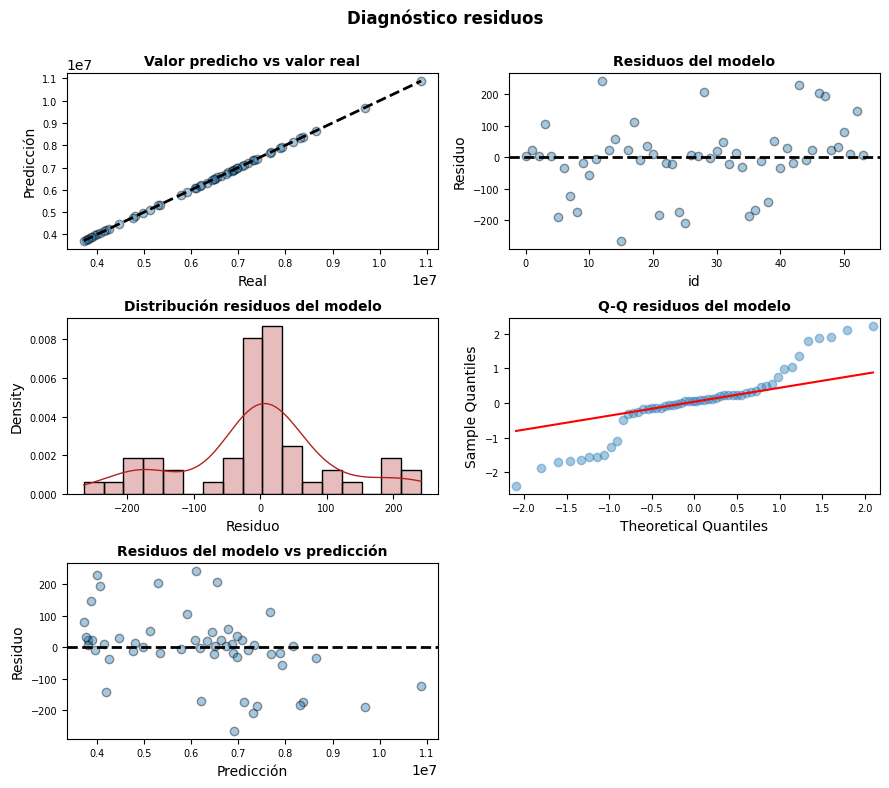

In [55]:
#Selección de variables
X = df_crops[['SORGHUM_Prec', 'SORGHUM_Temp']] 
y = df_crops['SORGHUM_Ha']

#Creación de train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)
X_train.shape, X_test.shape

#Aplicación del modelo
functions.XGB_Regressor(X_train, X_test, y_train, y_test, gamma=  0.00001, max_depth = 1, min_child_weight = 5, n_estimators = 10)

[up](#id0)

<div id='id35' />

### SOYBEANS

<div id='id36' />

#### Linear Regresion

(MAE) Test Mean absolute error: 7165692.18
(MSE) Test mean squared error: 2676.88
Test R2 score: -5.72


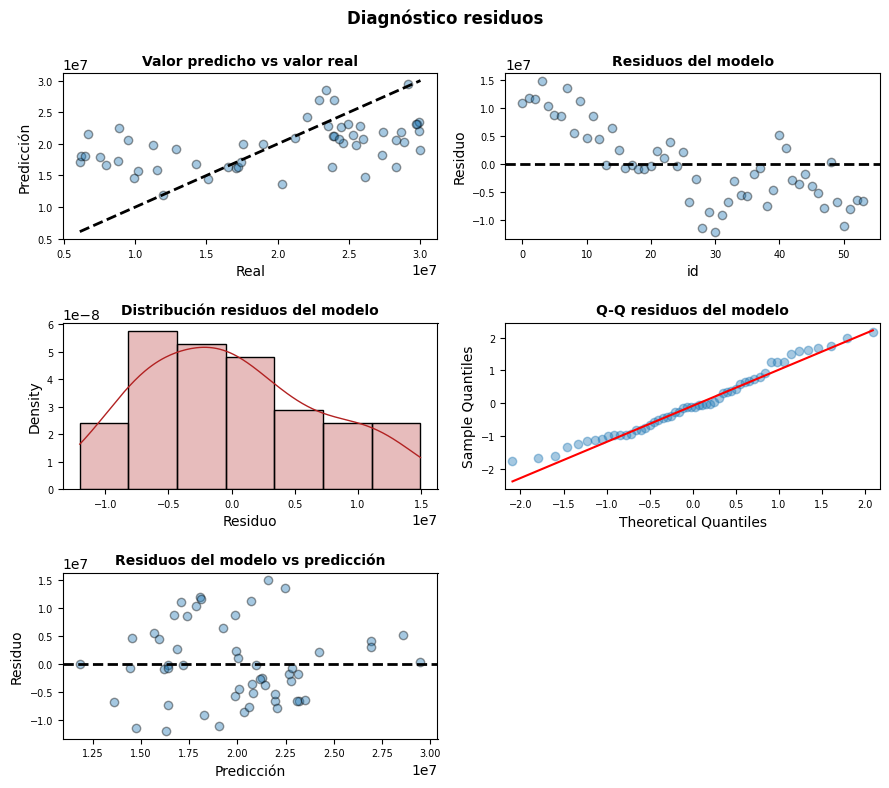

In [56]:
#Selección de variables
X = df_crops[['SOYBEANS_Prec', 'SOYBEANS_Temp']] 
y = df_crops['SOYBEANS_Ha']

#Creación de train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)
X_train.shape, X_test.shape

#Aplicación del modelo
functions.Linear_Regression(X_train, X_test, y_train, y_test)

[up](#id0)

<div id='id37' />

#### K Nearest Neighbour Regressor

(MAE) Test Mean absolute error: 7079767.99
(MSE) Test mean squared error: 2660.78
Test R2 score: -5.97


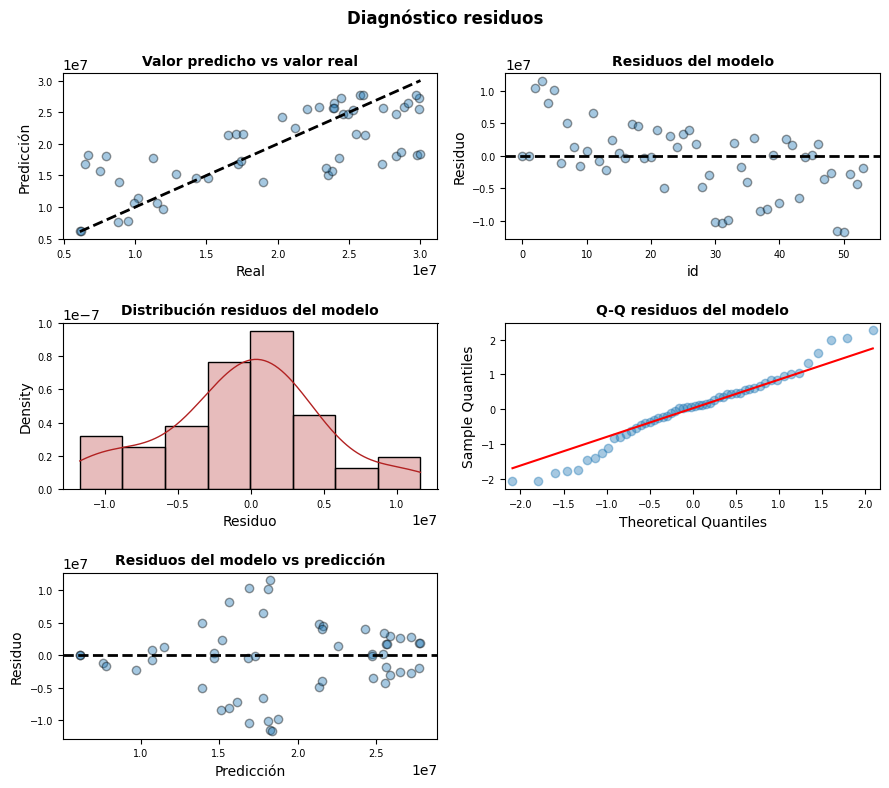

In [57]:
#Selección de variables
X = df_crops[['SOYBEANS_Prec', 'SOYBEANS_Temp']] 
y = df_crops['SOYBEANS_Ha']

#Creación de train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)
X_train.shape, X_test.shape

#Aplicación del modelo
functions.K_Nearest_Neighbour_Regressor(X_train, X_test, y_train, y_test)

[up](#id0)

<div id='id39' />

#### Random Forest

(MAE) Test Mean absolute error: 8820817.987
(MSE) Test mean squared error: 2969.986
Test R2 score: -9.424


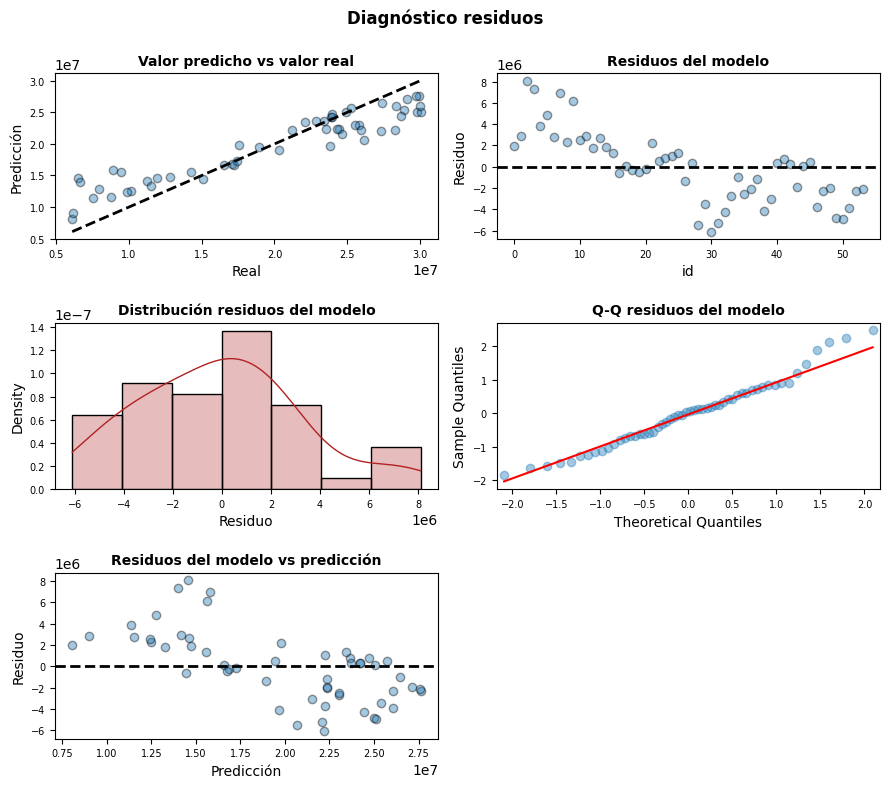

In [58]:
#Selección de variables
X = df_crops[['SOYBEANS_Prec', 'SOYBEANS_Temp']] 
y = df_crops['SOYBEANS_Ha']

#Creación de train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)
X_train.shape, X_test.shape

#Aplicación del modelo
functions.Random_Forest_regressor(X_train, X_test, y_train, y_test, criterion='absolute_error', max_depth= 1, max_features='auto', n_estimators= 5)

[up](#id0)

<div id='id40' />

#### XGboost

(MAE) Test Mean absolute error: 9645011.32
(MSE) Test mean squared error: 3105.642
Test R2 score: -12.134


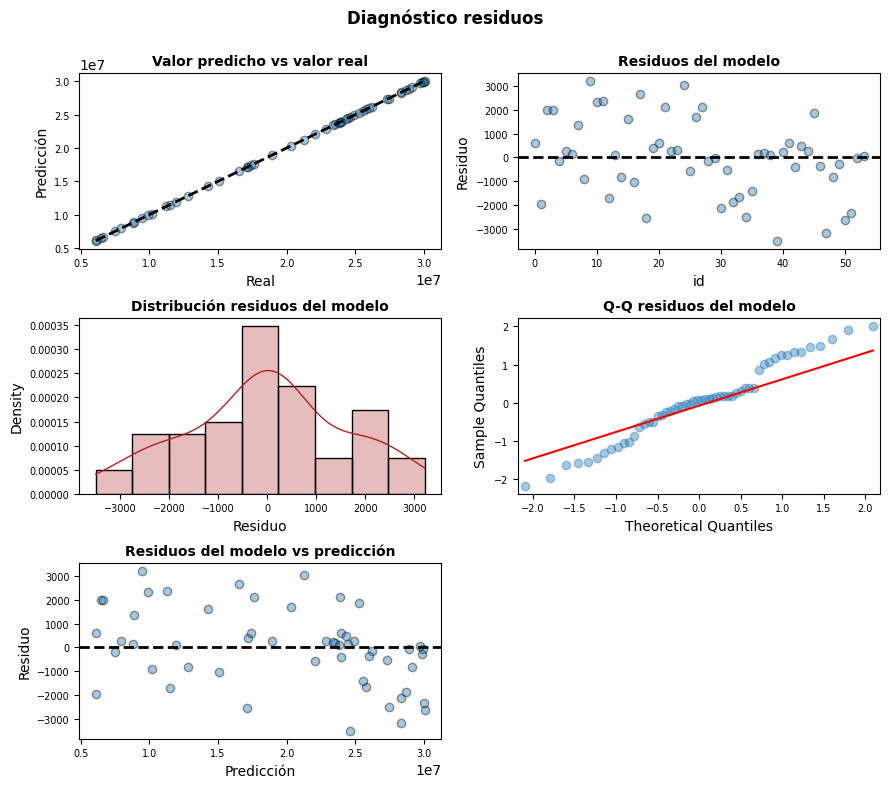

In [59]:
#Selección de variables
X = df_crops[['SOYBEANS_Prec', 'SOYBEANS_Temp']] 
y = df_crops['SOYBEANS_Ha']

#Creación de train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)
X_train.shape, X_test.shape

#Aplicación del modelo
functions.XGB_Regressor(X_train, X_test, y_train, y_test, gamma=  0.00001, max_depth = 1, min_child_weight = 5, n_estimators = 10)

[up](#id0)

<div id='id41' />

### WHEAT

<div id='id42' />

#### Linear Regresion

(MAE) Test Mean absolute error: 5633283.66
(MSE) Test mean squared error: 2373.45
Test R2 score: -6.58


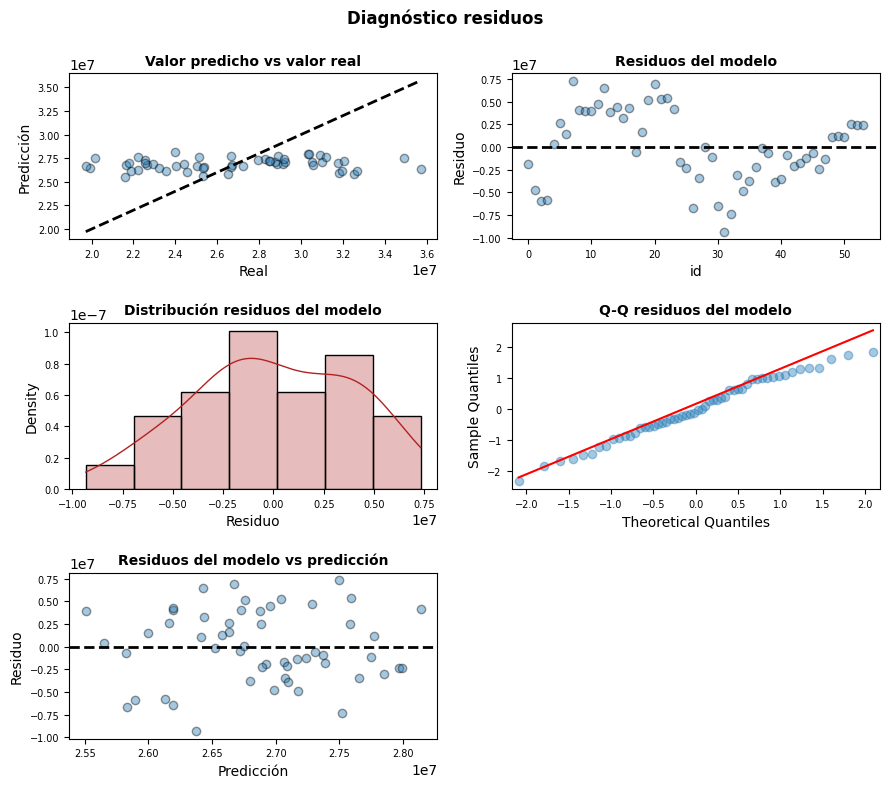

In [60]:
#Selección de variables
X = df_crops[['WHEAT_Prec', 'WHEAT_Temp']] 
y = df_crops['WHEAT_Ha']

#Creación de train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)
X_train.shape, X_test.shape

#Aplicación del modelo
functions.Linear_Regression(X_train, X_test, y_train, y_test)

[up](#id0)

<div id='id43' />

#### K Nearest Neighbour Regressor

(MAE) Test Mean absolute error: 6023267.74
(MSE) Test mean squared error: 2454.23
Test R2 score: -8.55


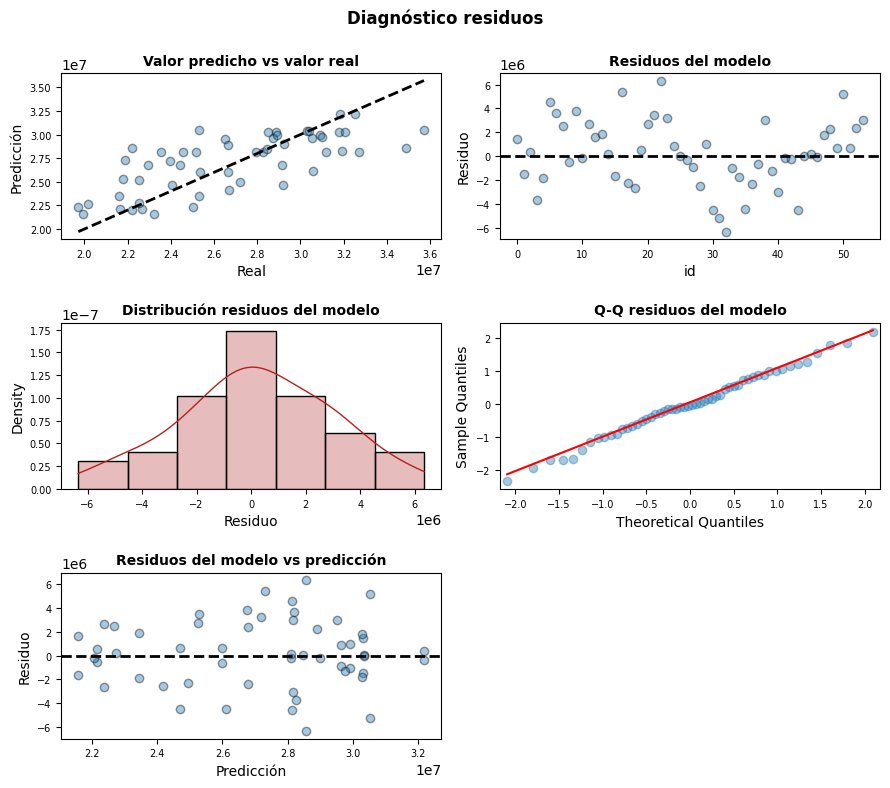

In [61]:
#Selección de variables
X = df_crops[['WHEAT_Prec', 'WHEAT_Temp']] 
y = df_crops['WHEAT_Ha']

#Creación de train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)
X_train.shape, X_test.shape

#Aplicación del modelo
functions.K_Nearest_Neighbour_Regressor(X_train, X_test, y_train, y_test)

[up](#id0)

<div id='id45' />

#### Random Forest

(MAE) Test Mean absolute error: 5862110.753
(MSE) Test mean squared error: 2421.18
Test R2 score: -6.966


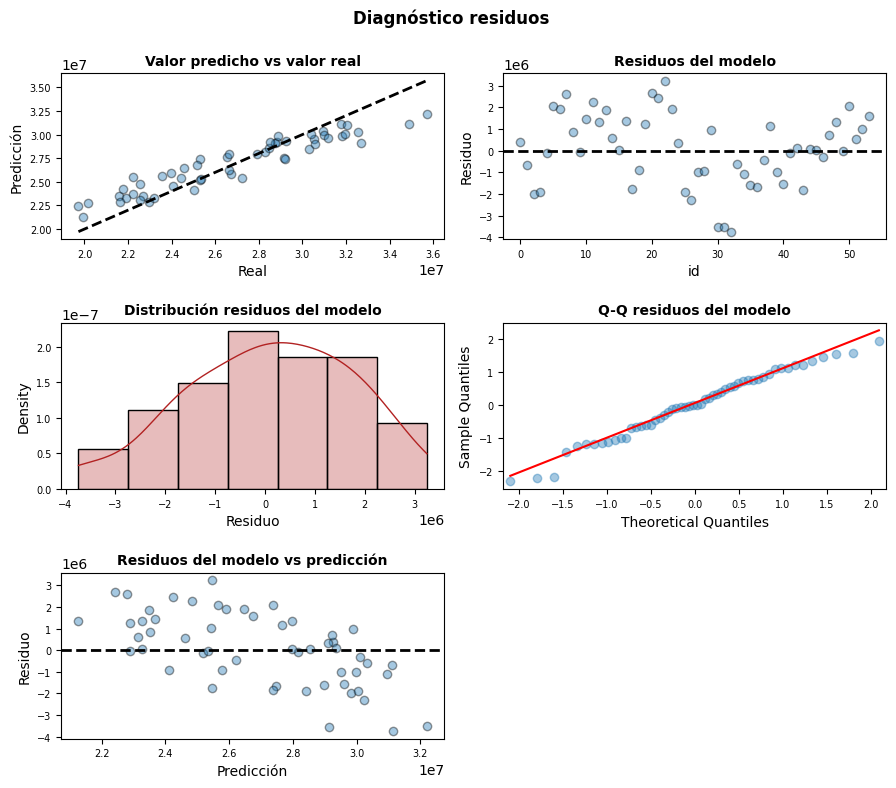

In [62]:
#Selección de variables
X = df_crops[['WHEAT_Prec', 'WHEAT_Temp']] 
y = df_crops['WHEAT_Ha']

#Creación de train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)
X_train.shape, X_test.shape

#Aplicación del modelo
functions.Random_Forest_regressor(X_train, X_test, y_train, y_test, criterion='friedman_mse', max_depth= 1, max_features='log2', n_estimators= 3)

[up](#id0)

<div id='id46' />

#### XGboost

(MAE) Test Mean absolute error: 4700554.181
(MSE) Test mean squared error: 2168.076
Test R2 score: -4.527


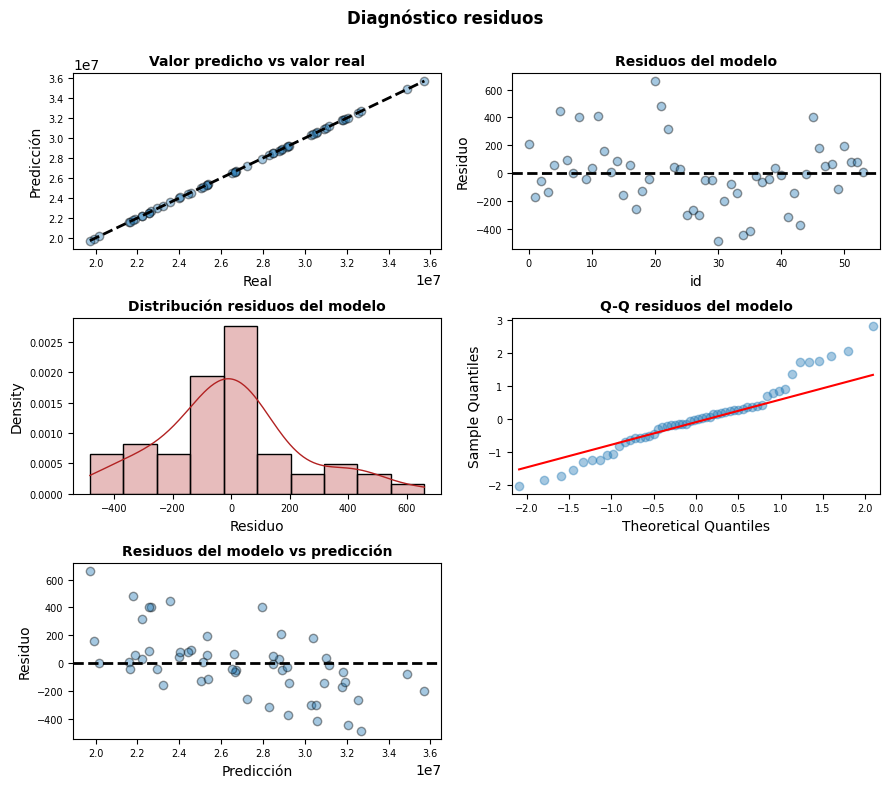

In [63]:
#Selección de variables
X = df_crops[['WHEAT_Prec', 'WHEAT_Temp']] 
y = df_crops['WHEAT_Ha']
#Creación de train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)
X_train.shape, X_test.shape

#Aplicación del modelo
functions.XGB_Regressor(X_train, X_test, y_train, y_test, gamma=  0.00001, max_depth = 1, min_child_weight = 2, n_estimators = 10)

[up](#id0)

<div id='id47' />

### GLOBAL

<div id='id48' />

#### Linear Regresion

(MAE) Test Mean absolute error: 2840585.39
(MSE) Test mean squared error: 1685.4
Test R2 score: -0.29


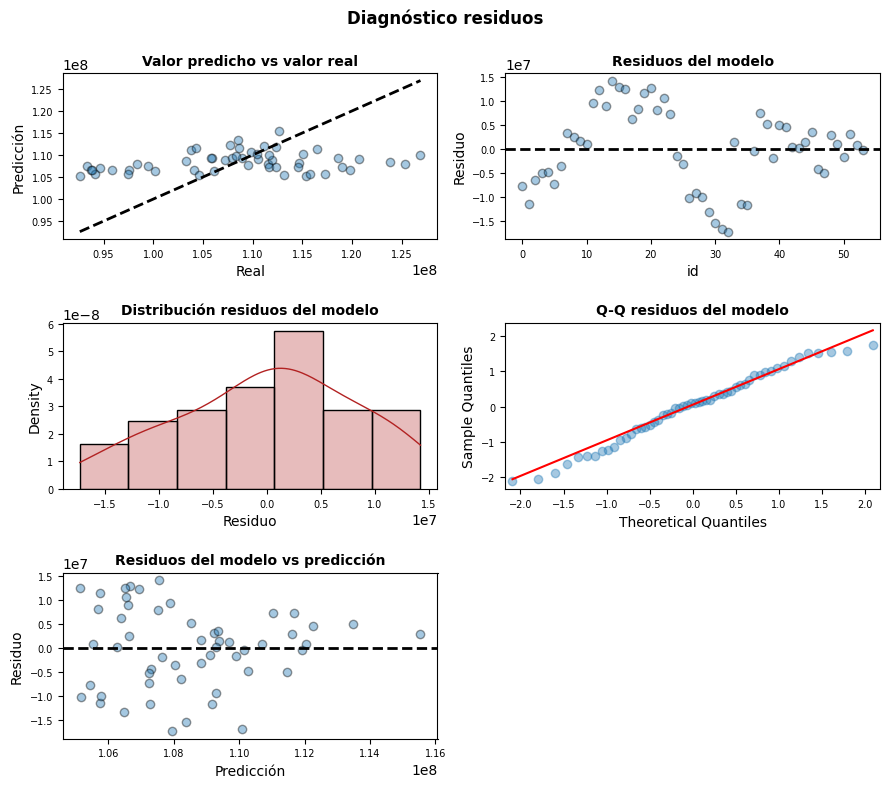

In [64]:
#Selección de variables
X = df_agrupation[['Precipitation', 'Temperature']]
y = df_agrupation['hectare']

#Creación de train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)
X_train.shape, X_test.shape

#Aplicación del modelo
functions.Linear_Regression(X_train, X_test, y_train, y_test)

[up](#id0)

<div id='id49' />

#### K Nearest Neighbour Regressor

(MAE) Test Mean absolute error: 5947172.99
(MSE) Test mean squared error: 2438.68
Test R2 score: -3.66


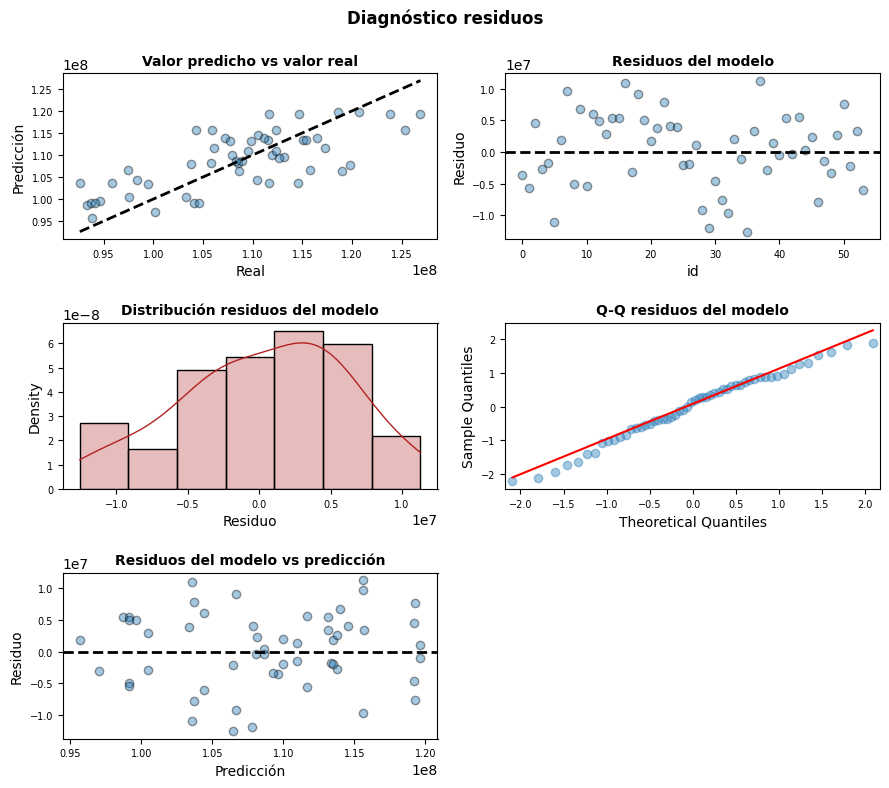

In [65]:
#Selección de variables
X = df_agrupation[['Precipitation', 'Temperature']]
y = df_agrupation['hectare']

#Creación de train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)
X_train.shape, X_test.shape

#Aplicación del modelo
functions.K_Nearest_Neighbour_Regressor(X_train, X_test, y_train, y_test)

[up](#id0)

<div id='id51' />

#### Random Forest

(MAE) Test Mean absolute error: 3890362.479
(MSE) Test mean squared error: 1972.4
Test R2 score: -1.142


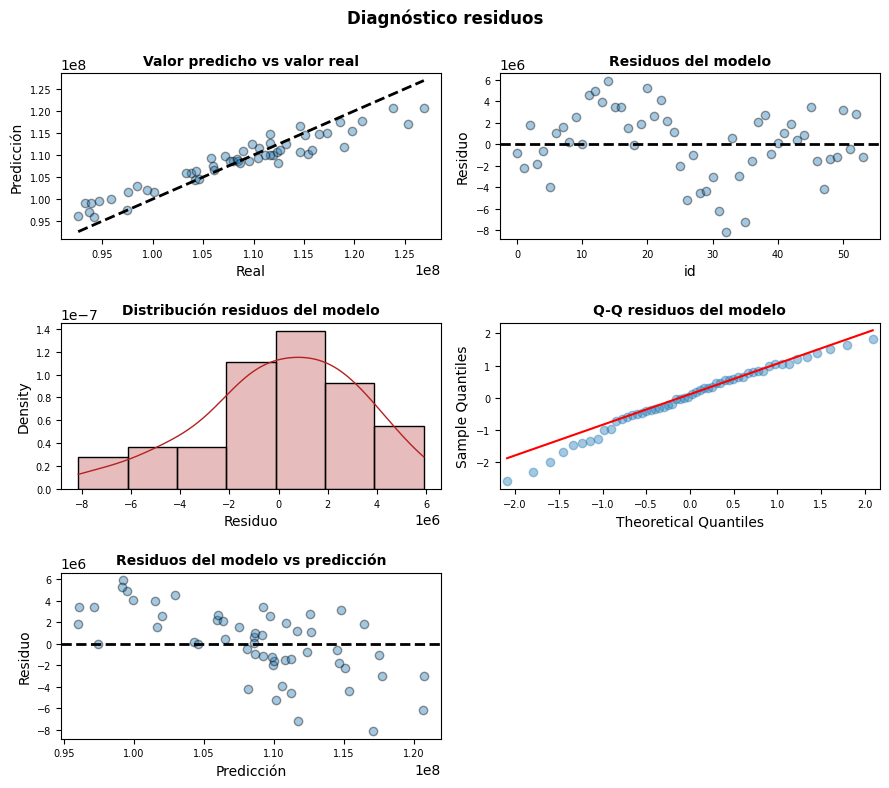

In [66]:
#Selección de variables
X = df_agrupation[['Precipitation', 'Temperature']]
y = df_agrupation['hectare']

#Creación de train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)
X_train.shape, X_test.shape

#Aplicación del modelo
functions.Random_Forest_regressor(X_train, X_test, y_train, y_test, criterion='friedman_mse', max_depth= 1, max_features='log2', n_estimators= 3)

[up](#id0)

<div id='id52' />

#### XGboost

(MAE) Test Mean absolute error: 5379760.978
(MSE) Test mean squared error: 2319.431
Test R2 score: -3.241


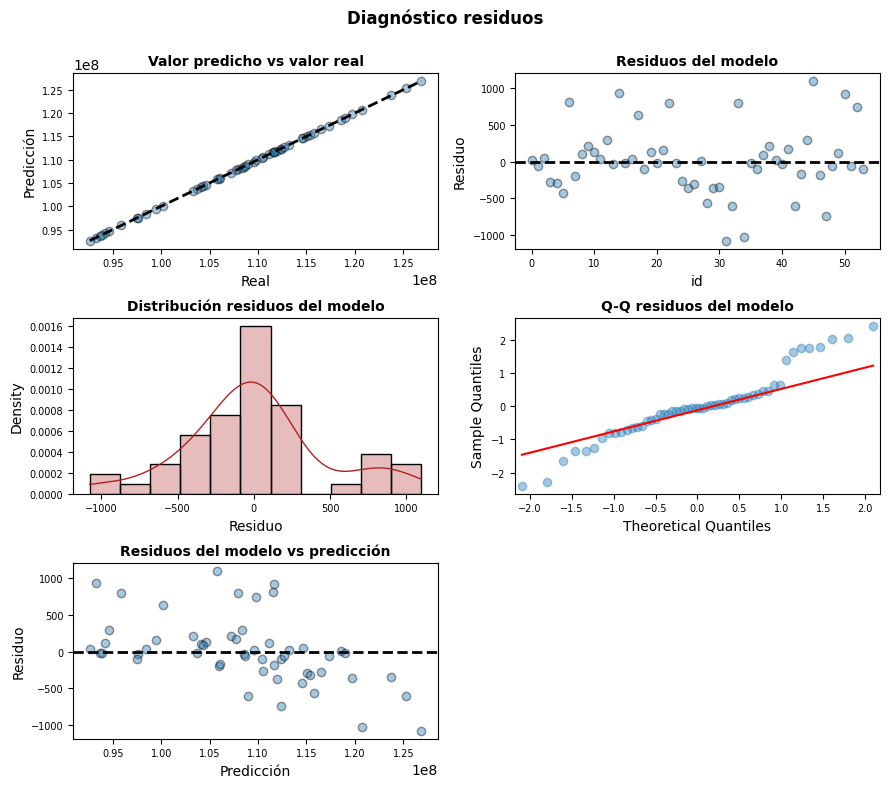

In [67]:
#Selección de variables
X = df_agrupation[['Precipitation', 'Temperature']]
y = df_agrupation['hectare']
#Creación de train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)
X_train.shape, X_test.shape

#Aplicación del modelo
functions.XGB_Regressor(X_train, X_test, y_train, y_test, gamma=  0.00001, max_depth = 1, min_child_weight = 6, n_estimators = 10)

[up](#id0)

<div id='id54' />

### Resumen y comparativa de los Modelos

In [82]:
df = pd.read_excel('../DATOS/archivos creados analisis/Tabla_resumen_modelos.xlsx')
df.rename(columns={'Unnamed: 0': 'Model name', 'Unnamed: 1':'Measures'}, inplace = True)
df

Model Name Measures     BARLEY       CORN     COTTON  \
0                Regresión Lineal      MAE 2027386.17 4403033.84 1364205.27   
1                Regresión Lineal      MSE    1423.86    2098.34    1167.99   
2                Regresión Lineal      R^2     -71.08      -4.31      -3.11   
3   K Nearest Neighbour Regressor      MAE 2500925.76 4457144.16 1585540.64   
4   K Nearest Neighbour Regressor      MSE    1581.43    2111.19    1259.18   
5   K Nearest Neighbour Regressor      R^2    -106.91      -4.76      -4.35   
6                   Random Forest      MAE 1933781.82 4705269.06 1111615.07   
7                   Random Forest      MSE    1390.61    2169.16    1054.33   
8                   Random Forest      R^2     -68.43      -5.27      -2.26   
9                         XGBoost      MAE 1736751.39 4642398.54 1341184.63   
10                        XGBoost      MSE    1317.86    2154.62    1158.10   
11                        XGBoost      R^2     -60.61      -5.38      -4.61   

         OATS   SORHGHUM    OYBEANS      WEATH     GLOBAL  
0  6667478.72 3034744.53 7165692.18 5633283.66 2840585.39  
1     2582.15    1742.05    2676.88    2373.45    1685.40  
2    -1004.40     -64.53      -5.72      -6.58      -0.29  
3  7427319.07 3613711.08 7079767.99 6023267.74 5947172.99  
4     2725.31    1900.98    2660.78    2454.23    2438.68  
5    -1468.72     -94.33      -5.97      -8.55      -3.66  
6  6719965.58 2720384.50 8820817.99 5862110.75 3890362.48  
7     2592.29    1649.36    2969.99    2421.18    1972.40  
8    -1100.03     -51.25      -9.42      -6.97      -1.14  
9  6657613.15 2761327.69 9645011.32 4700554.18 5379760.98  
10    2580.24    1661.72    3105.64    2168.08    2319.43  
11   -1182.69     -52.39     -12.13      -4.53      -3.24

In [88]:
MAE = df[df['Measures'] == 'MAE']
MAE.drop(columns='Measures', inplace = True)
MAE.set_index('Model Name', inplace = True)
MAE = MAE.T

MSE = df[df['Measures'] == 'MSE']
MSE.drop(columns='Measures', inplace = True)
MSE.set_index('Model Name', inplace = True)
MSE = MSE.T

R_2 = df[df['Measures'] == 'R^2']
R_2.drop(columns='Measures', inplace = True)
R_2.set_index('Model Name', inplace = True)
R_2 = R_2.T

In [89]:
#MAE

fig = px.bar(MAE, x=['Regresión Lineal', 'K Nearest Neighbour Regressor'], barmode='group', text_auto='.2s', title='MAE', color_discrete_sequence=px.colors.qualitative.Dark2, height=500, width= 1100)
fig.update_traces(textfont_size=15, textangle=0, textposition="outside", cliponaxis=False)
fig.update_layout(legend=dict(yanchor="top", y=0.25, xanchor="left", x=0.744))

fig1 = px.bar(MAE, x=['Random Forest', 'XGBoost'], barmode='group', text_auto='.2s' ,title='MAE',color_discrete_sequence=px.colors.qualitative.G10, height=500, width= 1100)
fig1.update_traces(textfont_size=15, textangle=0, textposition="outside", cliponaxis=False)
fig1.update_layout(legend=dict(yanchor="top", y=0.25, xanchor="left", x=0.84))

fig.show()
fig1.show()

In [90]:
#MSE

fig = px.bar(MSE, x=['Regresión Lineal', 'K Nearest Neighbour Regressor'], barmode='group', text_auto='.2s', title='MSE', color_discrete_sequence=px.colors.qualitative.Dark2, height=500, width= 1100)
fig.update_traces(textfont_size=15, textangle=0, textposition="outside", cliponaxis=False)
fig.update_layout(legend=dict(yanchor="top", y=0.25, xanchor="left", x=0.744))

fig1 = px.bar(MSE, x=['Random Forest', 'XGBoost'], barmode='group', text_auto='.2s' ,title='MSE',color_discrete_sequence=px.colors.qualitative.G10, height=500, width= 1100)
fig1.update_traces(textfont_size=15, textangle=0, textposition="outside", cliponaxis=False)
fig1.update_layout(legend=dict(yanchor="top", y=0.25, xanchor="left", x=0.84))

fig.show()
fig1.show()

In [91]:
#R_2

fig = px.bar(R_2, x=['Regresión Lineal', 'K Nearest Neighbour Regressor'], barmode='group', text_auto='.2s', title='R_2', color_discrete_sequence=px.colors.qualitative.Dark2, height=500, width= 1100)
fig.update_traces(textfont_size=15, textangle=0, textposition="outside", cliponaxis=False)
fig.update_layout(legend=dict(yanchor="top", y=0.97, xanchor="left", x=0.01))

fig1 = px.bar(R_2, x=['Random Forest', 'XGBoost'], barmode='group', text_auto='.2s' ,title='R_2',color_discrete_sequence=px.colors.qualitative.G10, height=500, width= 1100)
fig1.update_traces(textfont_size=15, textangle=0, textposition="outside", cliponaxis=False)
fig1.update_layout(legend=dict(yanchor="top", y=0.97, xanchor="left", x=0.01))

fig.show()
fig1.show()

[up](#id0)

<div id='id53' />

## Concluiones

-En el estudio de importancia de las variables con "Decision Tree" y "Random Forest" la variable independiente predominante y que mayor peso tiene sobre la variable dependiente es la temperatura en la mayoría de los casos.
- Como se ve en los resultados de los modelos, en ningún caso han sabido predecir o acercarse a una predicción similar a las variables de test. Esto es debido a que los datos en este caso son escasos. Siendo los modelos de regresión lineal y "K Nearest Neighbor" los que mayor acierto o han podido tener como se pueden observar en los índices de ajuste y las representaciones gráficas.